<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/LoanTap%20Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

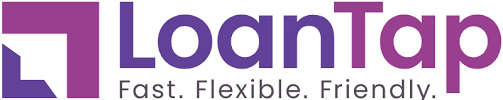

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

# **Business Problem**

* The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals
* In this case study will focus on the underwriting process behind Personal Loan only
* Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations


# **Desired Outcome of Analysis**
* Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
* Check how much target variable (Loan_Status) depends on different predictor variables (Use count plots, box plots, heat maps etc)
* Check correlation among independent variables and how they interact with each other
* Simple Feature Engineering steps:
E.g.: Creation of Flags- If value greater than 1.0 then 1 else 0. This can be done on:
1. Pub_rec
2. Mort_acc
3. Pub_rec_bankruptcies
* Missing values and Outlier Treatment
* Scaling - Using MinMaxScaler or StandardScaler
* Use Logistic Regression Model from Sklearn/Statsmodel library and explain the results
* Results Evaluation:
** Classification Report
** ROC AUC curve
** Precision recall curve
* Tradeoff Questions:
** How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.
** Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone
* Provide actionable Insights & Recommendations

# **Loading Modules and Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import  kstest
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import spearmanr
from scipy.stats import shapiro,levene
from statsmodels.graphics.gofplots import qqplot

import statsmodels.api as sm
!pip install category_encoders
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.1 MB/s eta 0:00:00


In [2]:
!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:00<00:00, 154MB/s] 


In [105]:
data = pd.read_csv("logistic_regression.csv")

**Description of each column in data**
* loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* term : The number of payments on the loan. Values are in months and can be either 36 or 60.
* int_rate : Interest Rate on the loan
* installment : The monthly payment owed by the borrower if the loan originates.
* grade : LoanTap assigned loan grade
* sub_grade : LoanTap assigned loan subgrade
* emp_title :The job title supplied by the Borrower when applying for the loan.*
* emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
* annual_inc : The self-reported annual income provided by the borrower during registration.
* verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
* issue_d : The month which the loan was funded
* loan_status : Current status of the loan - Target Variable
* purpose : A category provided by the borrower for the loan request.
* title : The loan title provided by the borrower
* dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
* earliest_cr_line :The month the borrower's earliest reported credit line was opened
* open_acc : The number of open credit lines in the borrower's credit file.
* pub_rec : Number of derogatory public records
* revol_bal : Total credit revolving balance
* revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* total_acc : The total number of credit lines currently in the borrower's credit file
* initial_list_status : The initial listing status of the loan. Possible values are – W, F
* application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
* mort_acc : Number of mortgage accounts.
* pub_rec_bankruptcies : Number of public record bankruptcies
* Address: Address of the individual

In [4]:
data.shape

(396030, 27)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


# **Statistical Analysis,Graphical Visualization & Insights**

### loan_status



Text(0.5, 1.0, 'loan_status feature')

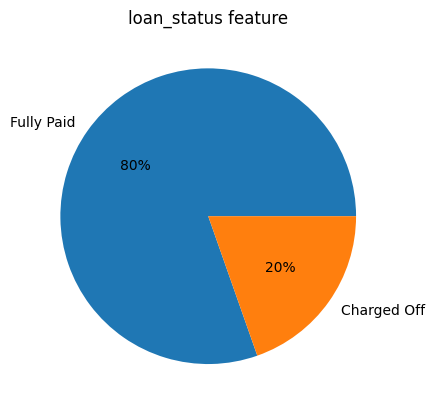

In [ ]:
plt.pie(x = data["loan_status"].value_counts().reset_index()["loan_status"],
        labels = data["loan_status"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("loan_status feature")

* 80% Loan applicant has Fully Paid and 20% applicant have not paid meaning Loantap should not have permitted loan for them
* This is the Target Variable
* we can see our data set is imbalanced as the Ratio is 4:1 for Fully Paid : Charged Off
* Further we have to balaned the data set ot use weight during training

Creating Separate data set asper Loan Status

In [ ]:
fullypaiddata = data[data["loan_status"] == "Fully Paid"]
Chargedoffdata = data[data["loan_status"] == "Charged Off"]

In [ ]:
fullypaiddata.shape

(318357, 27)

In [ ]:
Chargedoffdata.shape

(77673, 27)

### Term

In [ ]:
data["term"].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

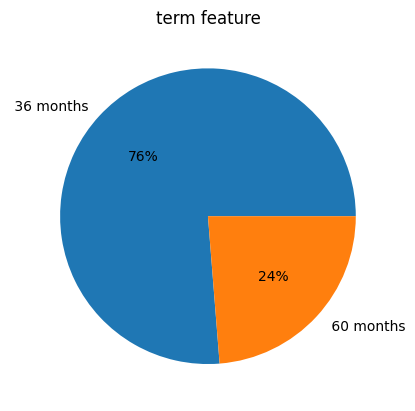

In [ ]:
plt.pie(x = data["term"].value_counts().reset_index()["term"],
        labels = data["term"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("term feature")
plt.show()

In [104]:
pd.crosstab(data["loan_status"],data["term"],normalize = "index")

term,36 months,60 months
loan_status,,
Charged Off,0.613341,0.386659
Fully Paid,0.798993,0.201007


* 76% of the Loans are having payment term as 36 Months
* Rest 24% have payment term as 60 Months
* loan_status Charged off have more accounts with term as 60 months

### loan_amnt

<Axes: xlabel='loan_amnt', ylabel='Count'>

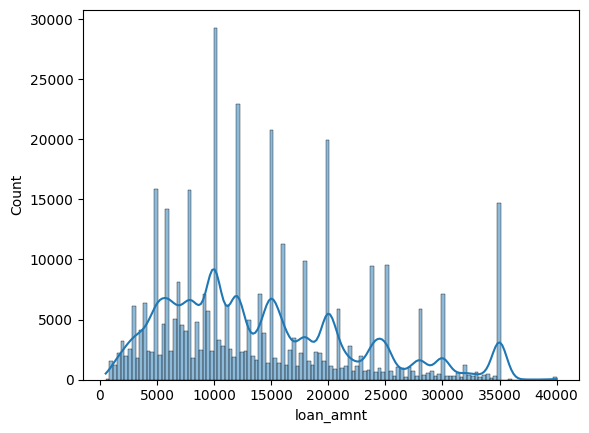

In [ ]:
sns.histplot(data["loan_amnt"],kde = True )

In [ ]:
data["loan_amnt"].describe()

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

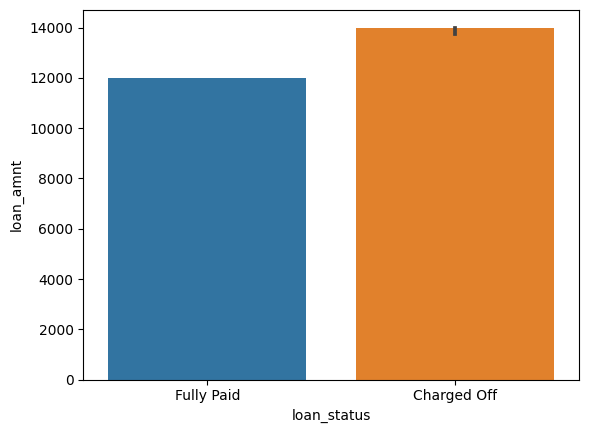

In [123]:
sns.barplot(data=data, x= "loan_status", y= "loan_amnt", estimator  = np.median)

* Loan Amount Range from 500 ~ 40000
* We can see high spikes of count in the loan amount at multiples of 5000
* However 75% amount of loan lie between 0 ~ 20000
* On an Average , Charged Off accounts have more Loan amount

### int_rate

<Axes: xlabel='int_rate', ylabel='Count'>

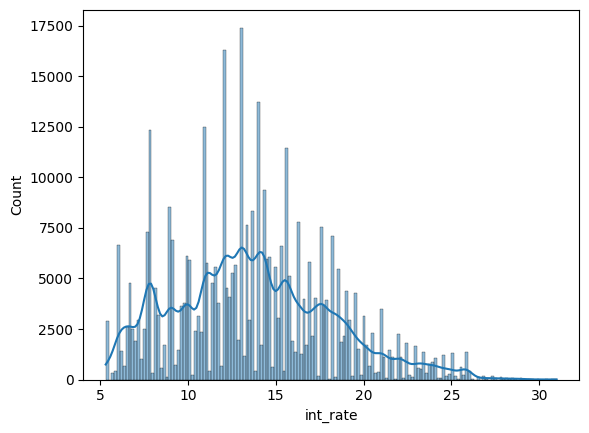

In [ ]:
sns.histplot(data["int_rate"],kde = True )

In [ ]:
data["int_rate"].describe()

count    396030.000000
mean         13.639400
std           4.472157
min           5.320000
25%          10.490000
50%          13.330000
75%          16.490000
max          30.990000
Name: int_rate, dtype: float64

In [ ]:
data[["loan_amnt","int_rate"]].corr()

,loan_amnt,int_rate
loan_amnt,1.000000,0.168921
int_rate,0.168921,1.000000


<Axes: xlabel='loan_amnt', ylabel='int_rate'>

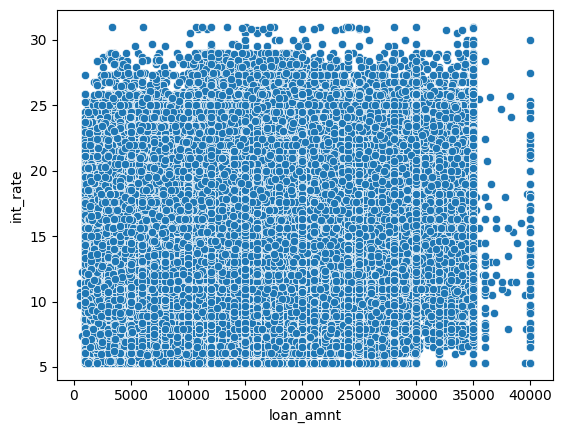

In [ ]:
sns.scatterplot(data=data,x = "loan_amnt", y= "int_rate")

<Axes: xlabel='loan_status', ylabel='int_rate'>

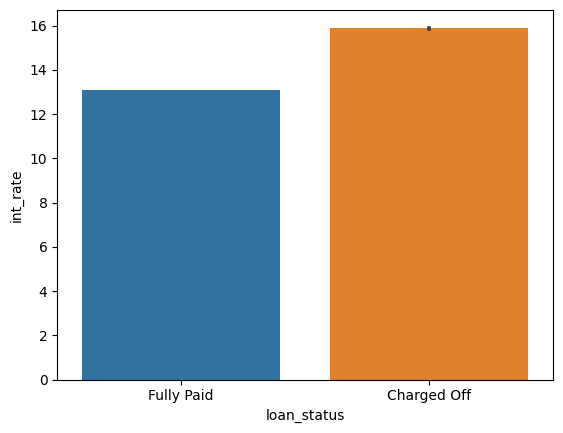

In [110]:
sns.barplot(data=data, x= "loan_status", y= "int_rate", estimator  = np.mean)

* "int_rate" Range from 5.32 ~ 30.99
* However "int_rate" for 75% loans lie between 5.32 ~ 16.49
* There is not much relationship between "loan_amnt" and "int_rate"
* On an Average , Charged Off accounts have more int_rate

### Installment

<Axes: xlabel='installment', ylabel='Count'>

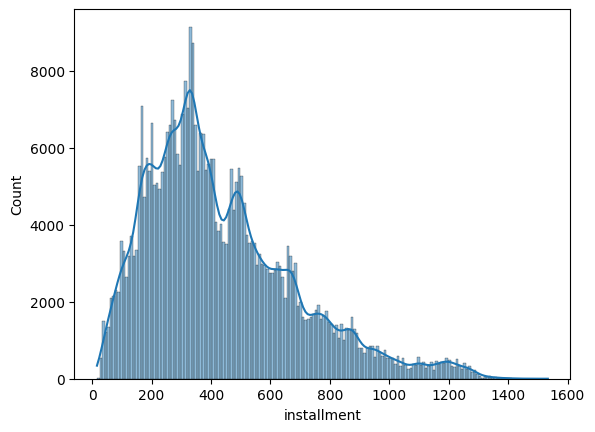

In [ ]:
sns.histplot(data["installment"],kde = True )

In [ ]:
data["installment"].describe()

count    396030.000000
mean        431.849698
std         250.727790
min          16.080000
25%         250.330000
50%         375.430000
75%         567.300000
max        1533.810000
Name: installment, dtype: float64

In [ ]:
data[["loan_amnt","int_rate","installment"]].corr()

,loan_amnt,int_rate,installment
loan_amnt,1.000000,0.168921,0.953929
int_rate,0.168921,1.000000,0.162758
installment,0.953929,0.162758,1.000000


<Axes: xlabel='loan_amnt', ylabel='int_rate'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


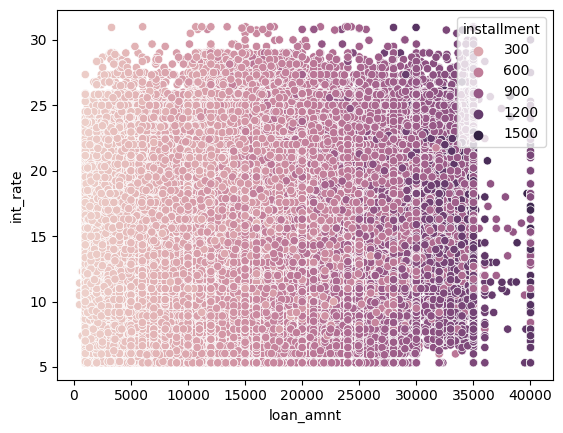

In [ ]:
sns.scatterplot(data=data,x = "loan_amnt", y= "int_rate",hue="installment")

<Axes: xlabel='loan_status', ylabel='installment'>

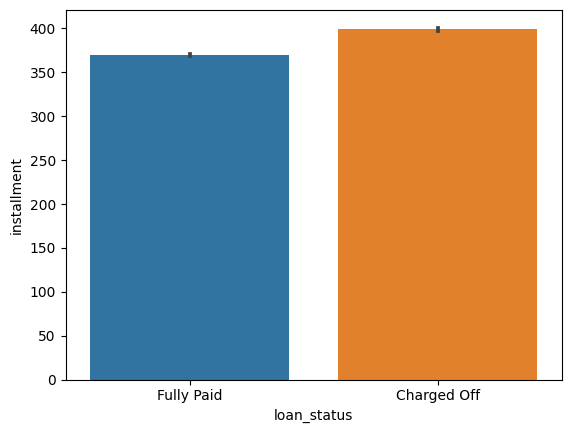

In [112]:
sns.barplot(data=data, x= "loan_status", y= "installment", estimator  = np.median)

* "installment" Range from 16 ~ 1533
* However "installment" for 75% loans lie < 567
* Installment and loan_amnt have high Correlation
* Installment and int_rate have low correlation
* On an Average Installement amount of Charged Off Accounts is Slightly More

### grade

In [ ]:
data["grade"].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

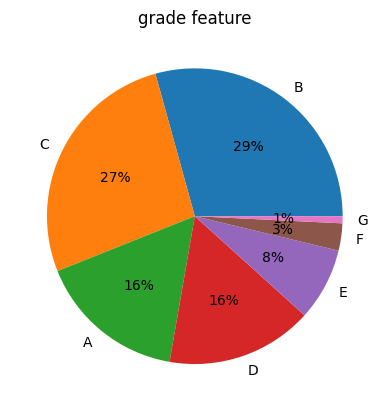

In [ ]:
plt.pie(x = data["grade"].value_counts().reset_index()["grade"],
        labels = data["grade"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("grade feature")
plt.show()

<Axes: xlabel='int_rate', ylabel='Density'>

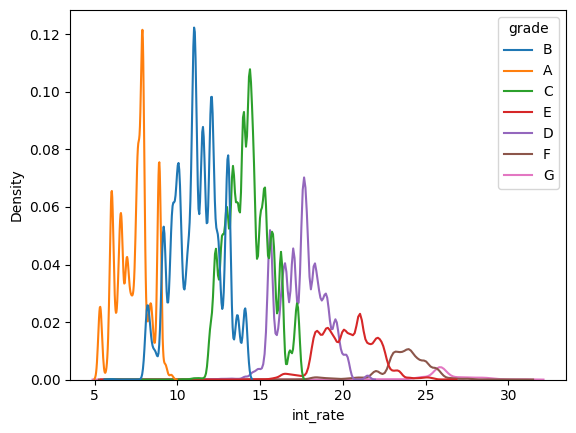

In [ ]:
sns.kdeplot(data=data, hue="grade",x="int_rate")

<Axes: xlabel='grade', ylabel='count'>

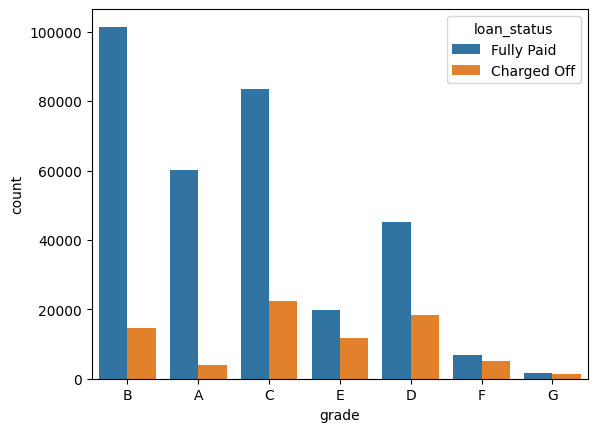

In [114]:
sns.countplot(data=data, hue="loan_status", x= "grade")

In [143]:
pd.crosstab(data["loan_status"],data["grade"],normalize = "columns")

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,0.062879,0.12573,0.211809,0.288678,0.373634,0.42788,0.478389
Fully Paid,0.937121,0.87427,0.788191,0.711322,0.626366,0.57212,0.521611


* 7 Types of grade have been assigned for each loan from A ~ G
* highest number of Loans are classified as Grade B and very less no of loan avaiable in Grade G
* "int_rate" approximately increase from A to G
* A grade Borrower have Less Charged off to Fully Paid  Ratio whereas as we move from B-->C-->D-->E-->F-->G Charged off to Fully Paid  Ratio increased

### sub_grade

<Axes: xlabel='sub_grade', ylabel='count'>

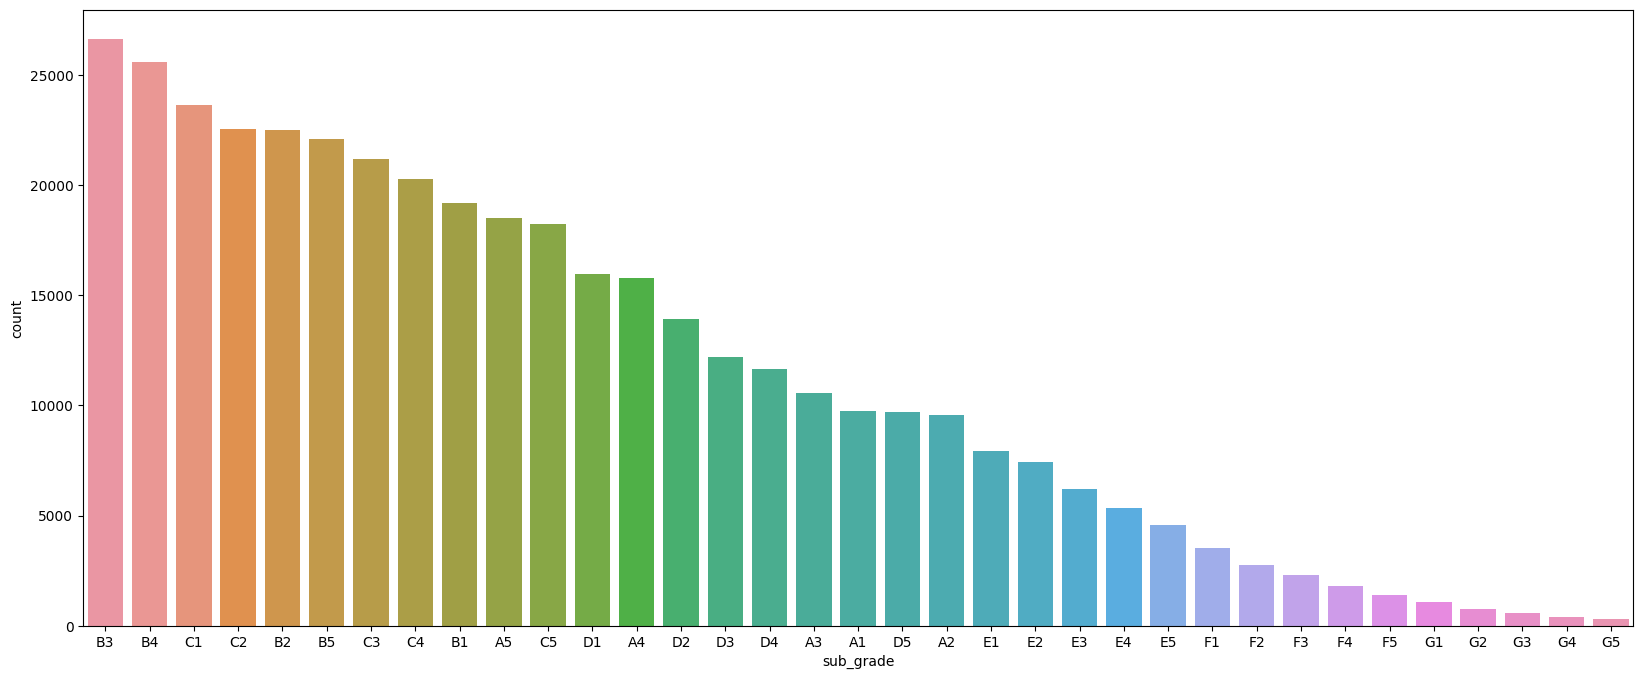

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(data=data, x= "sub_grade" ,order = data["sub_grade"].value_counts().index)

In [120]:
pd.crosstab(data["loan_status"],data["sub_grade"],normalize = "columns")

sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,0.028677,0.048186,0.058056,0.070239,0.084908,0.098582,0.108513,0.123354,0.138393,0.155037,...,0.387443,0.424801,0.436133,0.456072,0.486757,0.461248,0.482759,0.51087,0.449198,0.503165
Fully Paid,0.971323,0.951814,0.941944,0.929761,0.915092,0.901418,0.891487,0.876646,0.861607,0.844963,...,0.612557,0.575199,0.563867,0.543928,0.513243,0.538752,0.517241,0.48913,0.550802,0.496835


<Axes: xlabel='sub_grade', ylabel='count'>

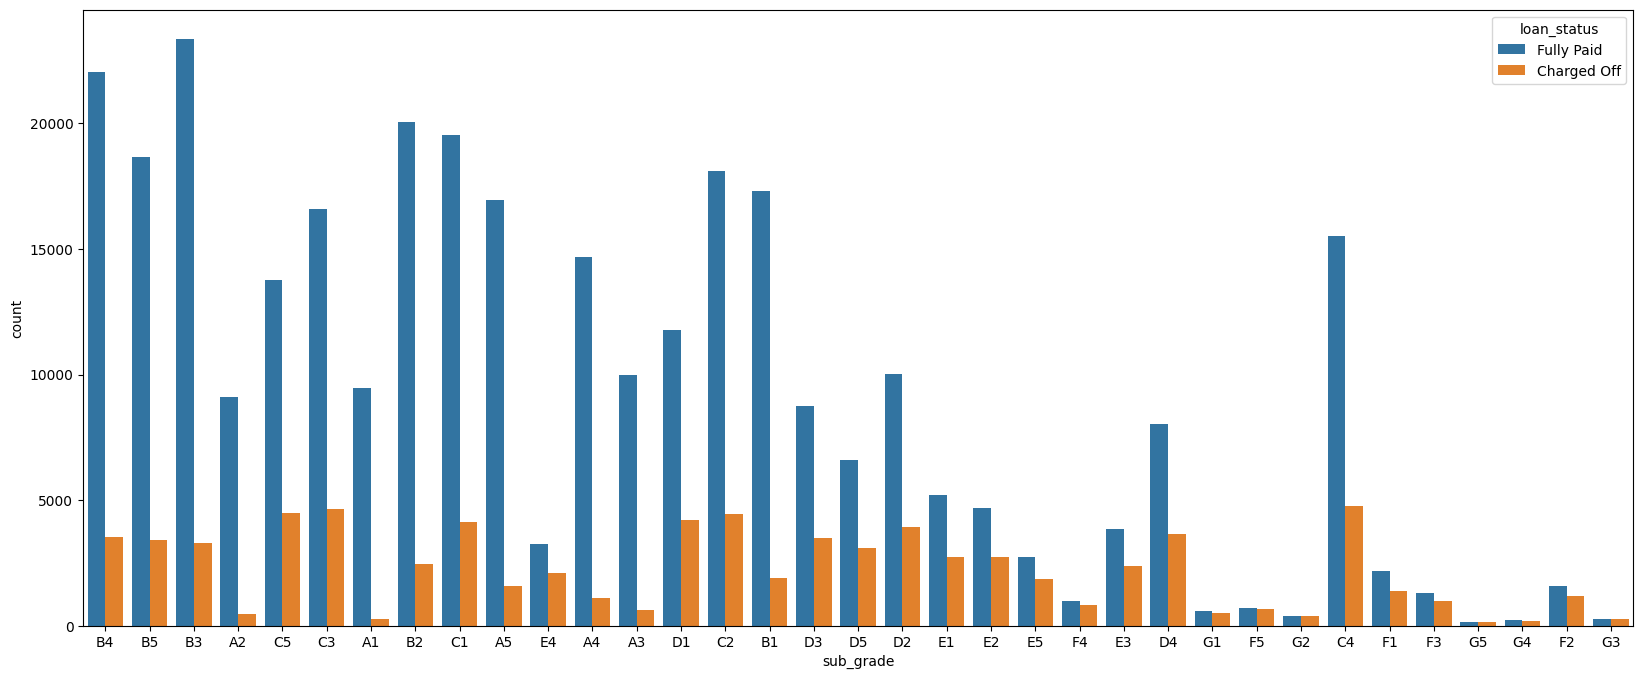

In [117]:
plt.figure(figsize = (20,8))
sns.countplot(data=data, hue="loan_status", x= "sub_grade")

* Each grade is sub divided into 5 subgrades
* Maximum loans are of B3 Grade and Minium loans are of G5
* As we moved from A1--> A5 --> B1 -->G4--> G5 , Ratio of Fully paid to Charged off Loan Status Reduced

### emp_title

In [ ]:
data["emp_title"].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

* There are 173105 types of emp_title for 393700 loans
* We will further check the influence of these Features
* As different type of Income parametersline debt to Income Ratio, Moratage, Loan, Public_rec_bankruptcies have already been considered, so we can drop this Feature

### emp_length

In [ ]:
data["emp_length"].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [ ]:
data["emp_length"] = data["emp_length"].astype(str).apply(lambda x : x.split(" year")[0])

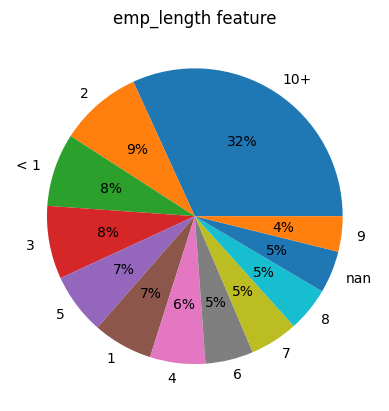

In [ ]:
plt.pie(x = data["emp_length"].value_counts().reset_index()["emp_length"],
        labels = data["emp_length"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("emp_length feature")
plt.show()

In [121]:
pd.crosstab(data["loan_status"],data["emp_length"],normalize = "columns")

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
loan_status,,,,,,,,,,,
Charged Off,0.199135,0.184186,0.193262,0.195231,0.192385,0.192187,0.189194,0.194774,0.19976,0.20047,0.206872
Fully Paid,0.800865,0.815814,0.806738,0.804769,0.807615,0.807813,0.810806,0.805226,0.80024,0.79953,0.793128


* 32% of loans are applicants with Employement length > 10 Years
* 45% of loan are applicants with Employment length < = 5years
* Rest 19% applicants have employment length 5 < x <= 10
* Fully paid to Charged Off Ratio reamained same irrespective of emp_length

### home_ownership

In [ ]:
data["home_ownership"].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

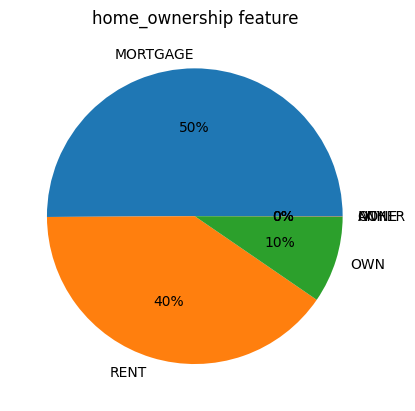

In [ ]:
plt.pie(x = data["home_ownership"].value_counts().reset_index()["home_ownership"],
        labels = data["home_ownership"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("home_ownership feature")
plt.show()

In [122]:
pd.crosstab(data["loan_status"],data["home_ownership"],normalize = "columns")

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,,
Charged Off,0.0,0.169561,0.225806,0.142857,0.206803,0.226622
Fully Paid,1.0,0.830439,0.774194,0.857143,0.793197,0.773378


* 50% Applicants are of staying in Mortage Home
* 40% Applicants are staying in Rented Home
* 10 % Applicants are staying in Own House
* Rented home_ownership borrowers have high chance of Charged_off Loan status among all home_ownership types

### annual_inc

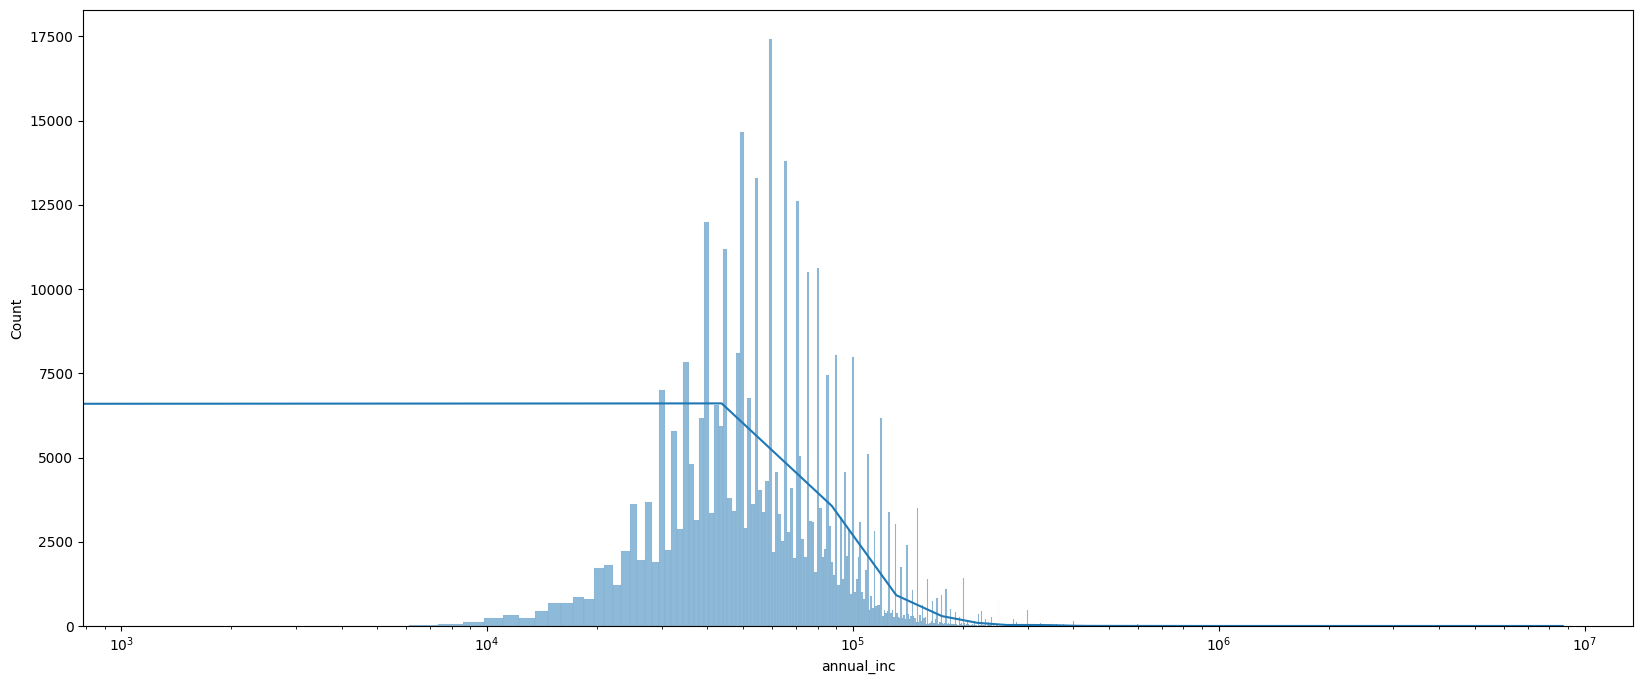

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(data["annual_inc"],kde = True )
plt.xscale("log")

In [ ]:
data["annual_inc"].describe()

count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

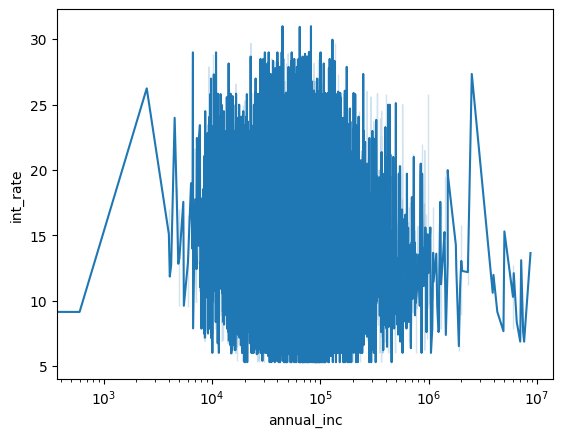

In [ ]:
sns.lineplot(data=data, x= "annual_inc", y="int_rate")
plt.xscale('log')
plt.show()

In [ ]:
data[["annual_inc","int_rate","loan_amnt","installment"]].corr()

,annual_inc,int_rate,loan_amnt,installment
annual_inc,1.000000,-0.056771,0.336887,0.330381
int_rate,-0.056771,1.000000,0.168921,0.162758
loan_amnt,0.336887,0.168921,1.000000,0.953929
installment,0.330381,0.162758,0.953929,1.000000


<Axes: xlabel='loan_status', ylabel='annual_inc'>

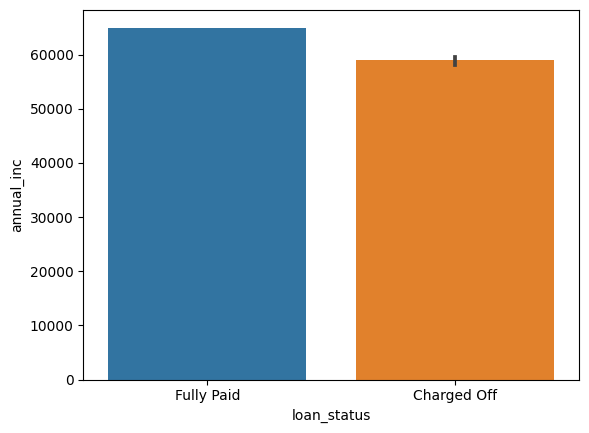

In [124]:
sns.barplot(data=data, x= "loan_status", y= "annual_inc", estimator  = np.median)

* annual_inc range from 0 ~ 8,706,582
* Most of the Applicants income lies between 10,000 ~1,000,000
* 0.33 Correlation found Between Annual_inc & Loan_amount;Annual_inc & installment
* Very least -ve correlation[-0.05] found between Annual_inc & Int_rate
* On an average, Fully Paid Borrowers has more annual Income than Charged_off Borrowers



### verification_status

In [126]:
data["verification_status"].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

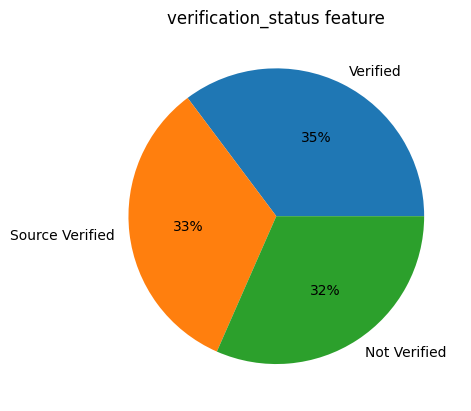

In [ ]:
plt.pie(x = data["verification_status"].value_counts().reset_index()["verification_status"],
        labels = data["verification_status"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("verification_status feature")
plt.show()

In [125]:
pd.crosstab(data["loan_status"],data["verification_status"],normalize = "columns")

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,0.14636,0.214743,0.223211
Fully Paid,0.85364,0.785257,0.776789


* 68% of Applicants have been Verified
* Suprisingly Not Verified Borrower have high Ratio of Fully Paid to Charged Off members

### issue_d

* issue_d is month in which the loan was funded
* let convert it into Date time and extract Issue month & Issue Year features

In [132]:
data["issue_d"]=data["issue_d"].astype("datetime64")

In [8]:
data["issue_month"] = data['issue_d'].dt.month
data["issue_year"] = data['issue_d'].dt.year

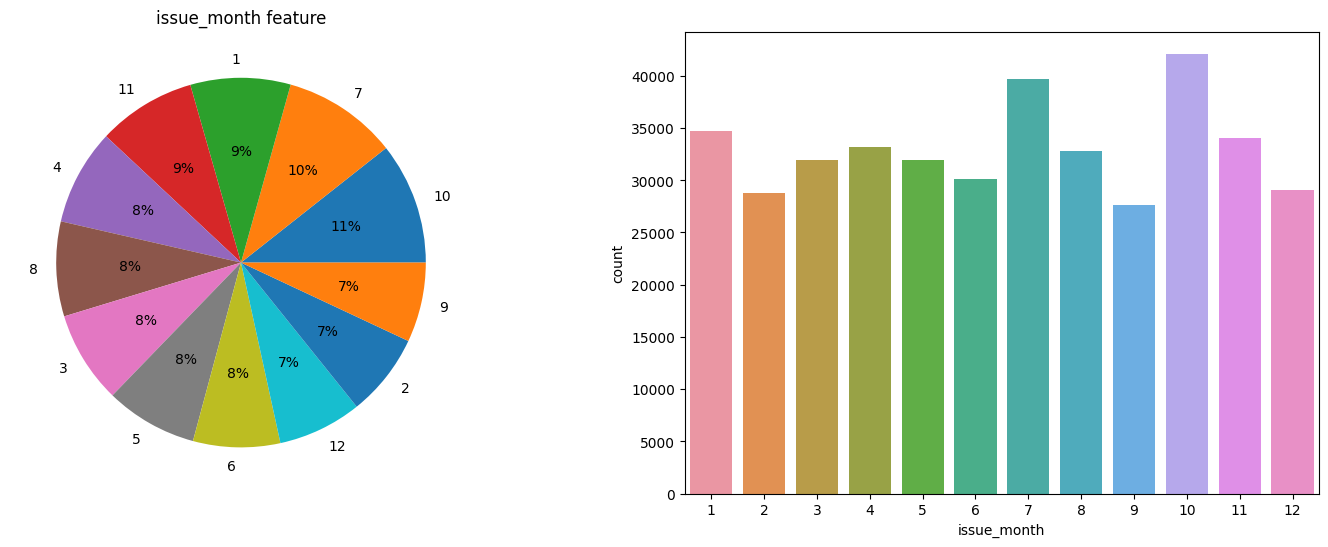

In [9]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
plt.pie(x = data["issue_month"].value_counts().reset_index()["issue_month"],
        labels = data["issue_month"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("issue_month feature")
plt.subplot(1, 2, 2)
sns.countplot(data=data, x="issue_month", order = sorted(data["issue_month"].unique()))
plt.show()

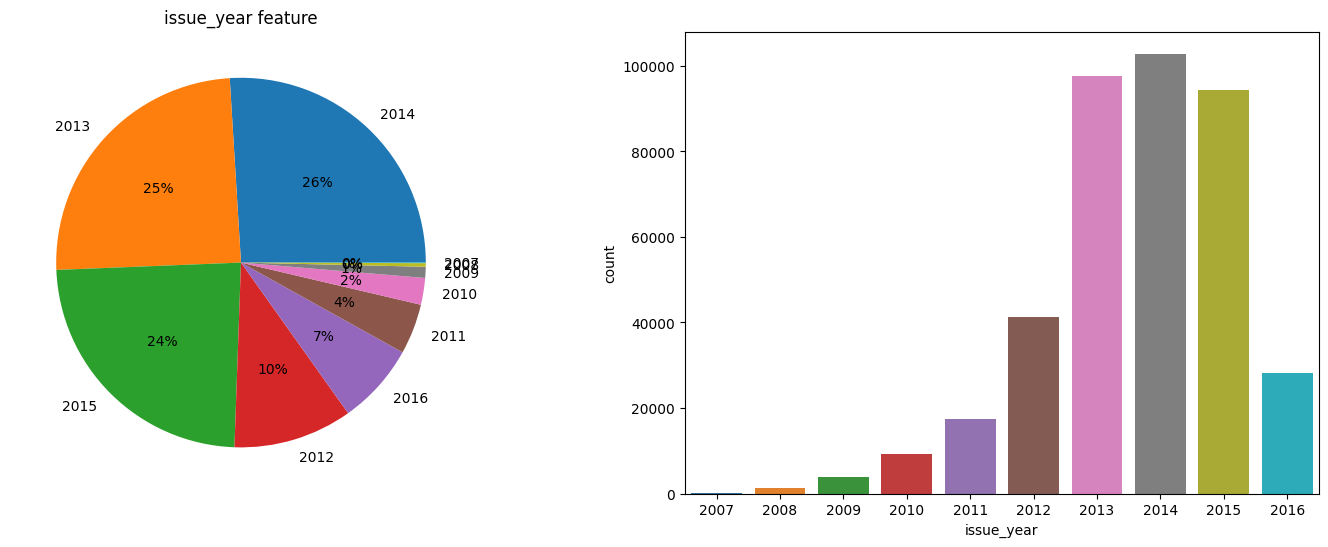

In [10]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
plt.pie(x = data["issue_year"].value_counts().reset_index()["issue_year"],
        labels = data["issue_year"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("issue_year feature")
plt.subplot(1, 2, 2)
sns.countplot(data=data, x="issue_year", order = sorted(data["issue_year"].unique()))
plt.show()

* Loans are more funded in the month of October and next in July month
* Loans funding has gradually increased from year 2007 & peaked at 2014

### purpose

In [ ]:
data["purpose"].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

Text(0.5, 1.0, 'purpose feature')

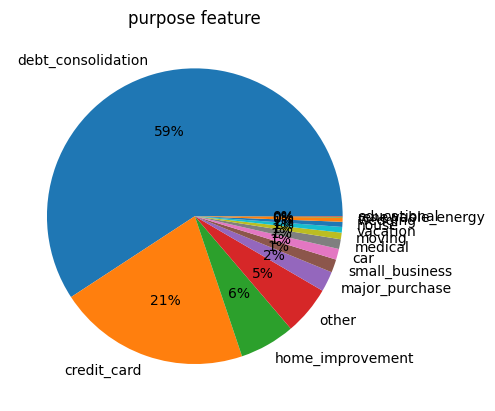

In [ ]:
plt.pie(x = data["purpose"].value_counts().reset_index()["purpose"],
        labels = data["purpose"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("purpose feature")

In [127]:
pd.crosstab(data["loan_status"],data["purpose"],normalize = "columns")

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,0.134767,0.167118,0.207414,0.163424,0.170079,0.197183,0.164733,0.217112,0.234758,0.212178,0.234043,0.29451,0.189233,0.120861
Fully Paid,0.865233,0.832882,0.792586,0.836576,0.829921,0.802817,0.835267,0.782888,0.765242,0.787822,0.765957,0.70549,0.810767,0.879139


* Major Purpose of borrower is Debt_consolidation
* Borrowers of Small_bussiness purpose have high propability of Charged off
* Borrowers of Wedding purpose have low propability of Charged off

### title

In [ ]:
data["title"].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [ ]:
data["title"].nunique()

48817

* We can see this Feature is Reducntant when compared to earlier purpose features as Purpose feature has refined all the Title given by borrower and categorised properly
* so we can drop this feature

In [ ]:
data.drop(columns = ("title"),inplace = True)

### dti

In [ ]:
data["dti"].describe()

count    396030.000000
mean         17.379514
std          18.019092
min           0.000000
25%          11.280000
50%          16.910000
75%          22.980000
max        9999.000000
Name: dti, dtype: float64

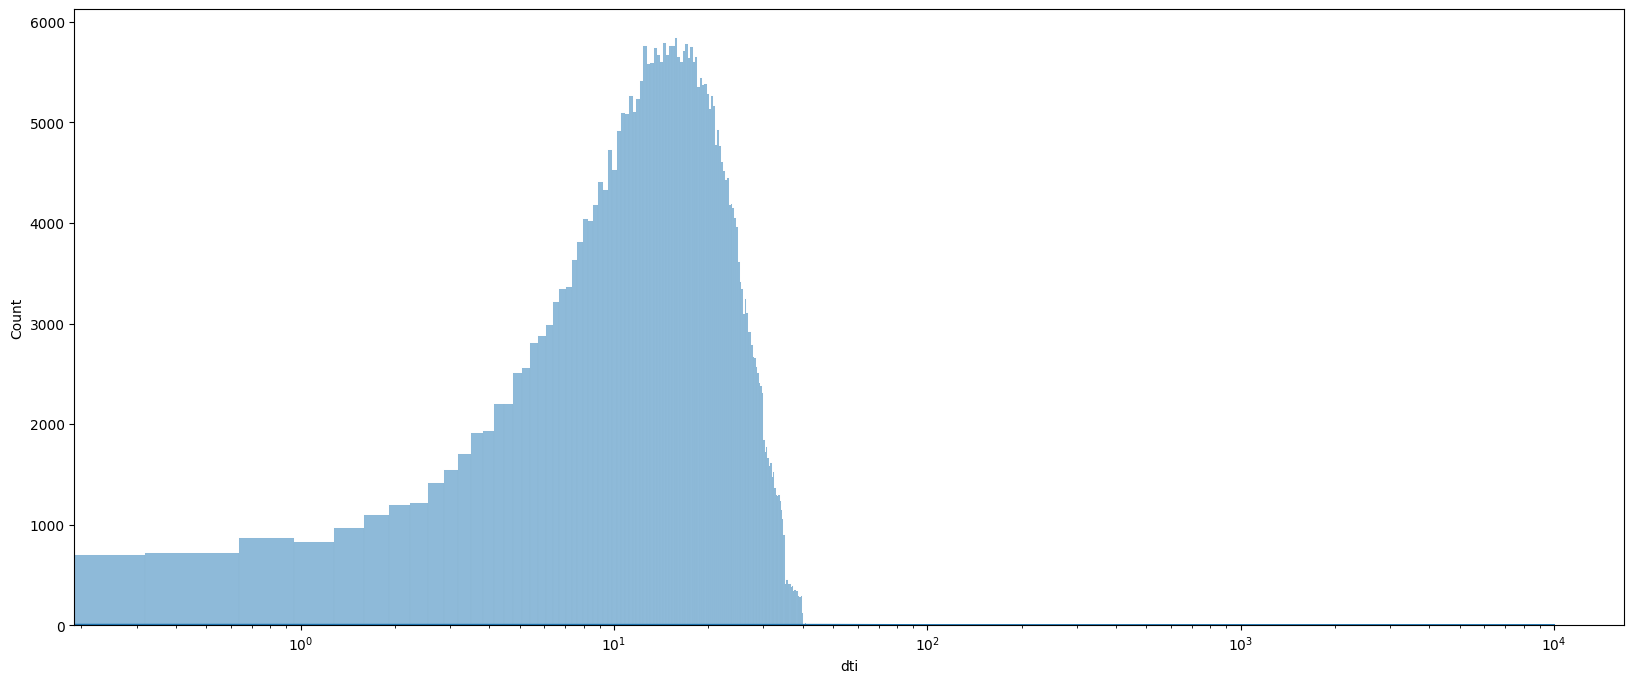

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(data=data, x ="dti", kde = True)
plt.xscale('log')
plt.show()

<Axes: xlabel='loan_status', ylabel='dti'>

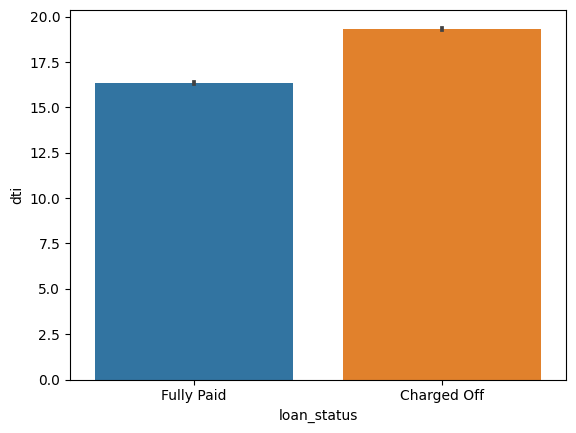

In [128]:
sns.barplot(data=data, x= "loan_status", y= "dti", estimator  = np.median)

* dti ranges from 0 ~ 9999
* however 75% of borrowers have dti < 23
* On an Average DTI is high from Charged_Off Borrowers

### earliest_cr_line

In [ ]:
data["earliest_cr_line"].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [130]:
data["earliest_cr_line"] = data["earliest_cr_line"].astype("datetime64")

In [ ]:
data["earliest_cr_line"].describe(datetime_is_numeric=True)

count                           396030
mean     1998-05-03 09:34:15.062495488
min                1944-01-01 00:00:00
25%                1994-10-01 00:00:00
50%                1999-09-01 00:00:00
75%                2003-04-01 00:00:00
max                2013-10-01 00:00:00
Name: earliest_cr_line, dtype: object

* Above feature is giving information abour the Earliest Credit line opened for Borrower
* As such this feature might not be useful
* lets calculate the difference between issue_d and earliest_cr_line

In [133]:
data['Borrowing_hist'] = (data['issue_d'] - data['earliest_cr_line']) / np.timedelta64(1, 'M')

In [ ]:
data['Borrowing_hist'].describe()

count    396030.000000
mean        189.055758
std          86.414635
min          35.976098
25%         130.992423
50%         172.028173
75%         232.021191
max         841.972114
Name: Borrowing_hist, dtype: float64

<Axes: xlabel='Borrowing_hist', ylabel='Count'>

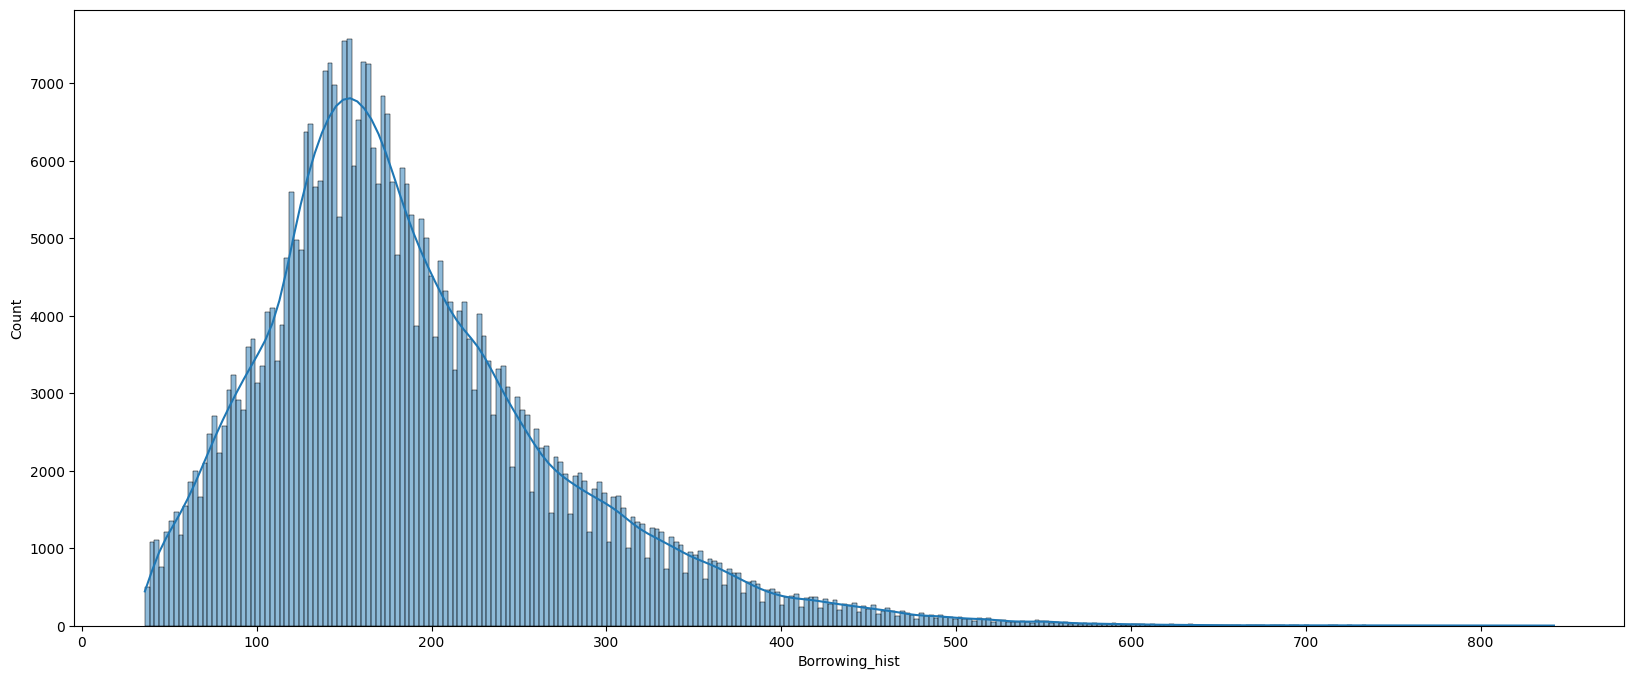

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(data["Borrowing_hist"],kde = True )

<Axes: xlabel='loan_status', ylabel='Borrowing_hist'>

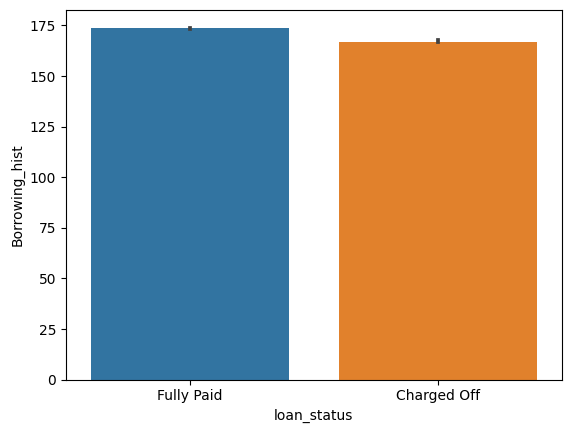

In [134]:
sns.barplot(data=data, x= "loan_status", y= "Borrowing_hist", estimator  = np.median)

* Borrowing history of Borrower range from 36 ~ 842 Months
* 75% of borrower have history of 232 Month maximum only
* Borrowing history is slightly high for Fully Paid Borrowers

### open_acc

In [ ]:
data["open_acc"].describe()

count    396030.000000
mean         11.311153
std           5.137649
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          90.000000
Name: open_acc, dtype: float64

<Axes: xlabel='open_acc', ylabel='Count'>

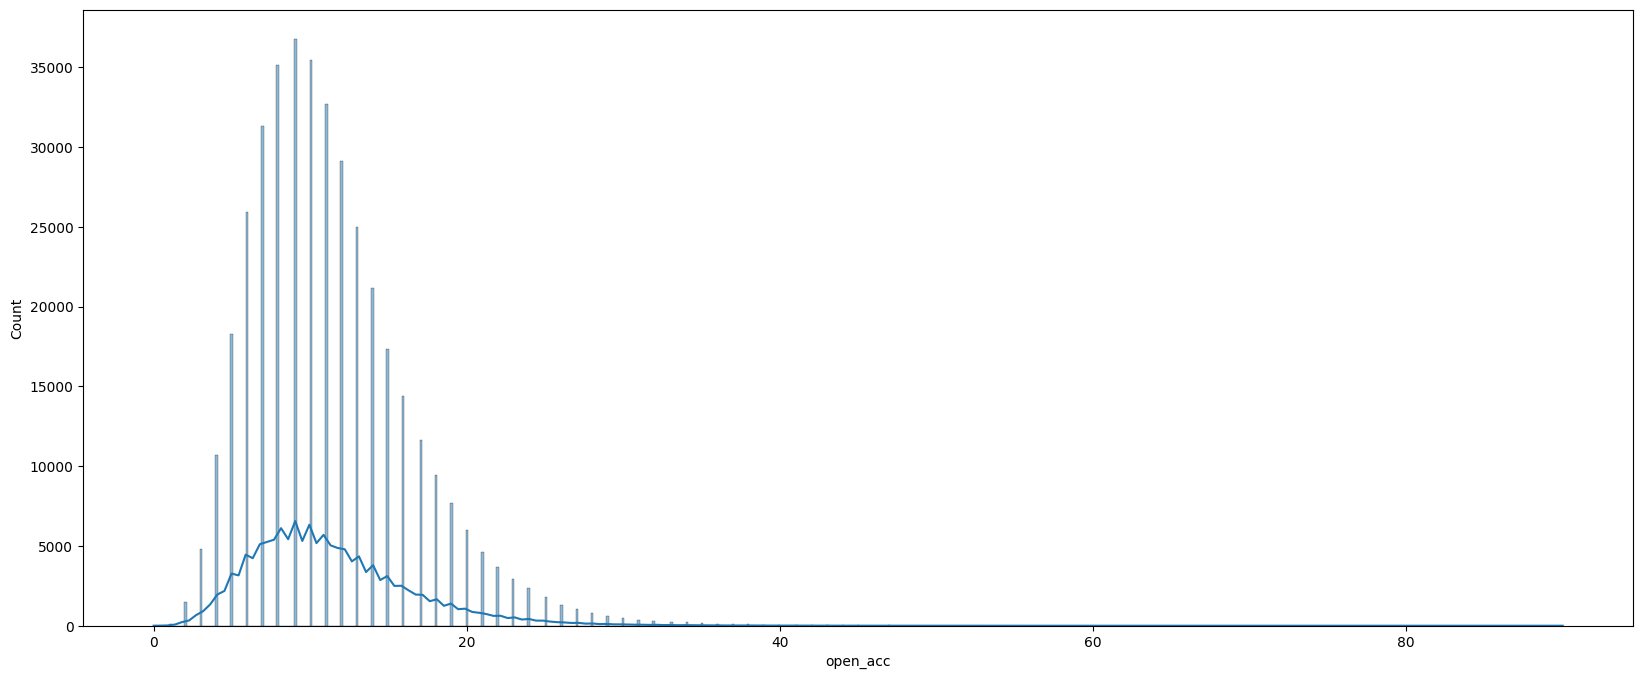

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(data["open_acc"],kde = True )

<Axes: xlabel='loan_status', ylabel='open_acc'>

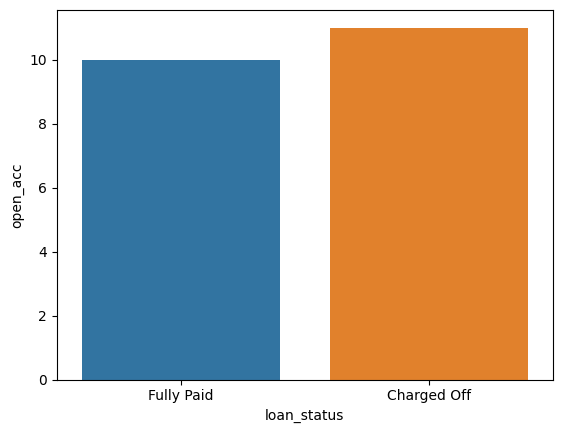

In [135]:
sns.barplot(data=data, x= "loan_status", y= "open_acc", estimator  = np.median)

* number of open credit lines in the borrower's credit file lies between 0 ~ 90
* However 75% of the Borrowers have Credit lines < 14
* On an Average Charged off Borrowers have high Open Credit Lines

### pub_rec

In [ ]:
data["pub_rec"].describe()

count    396030.000000
mean          0.178191
std           0.530671
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64

In [ ]:
data["pub_rec"].value_counts()

0.0     338272
1.0      49739
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: pub_rec, dtype: int64

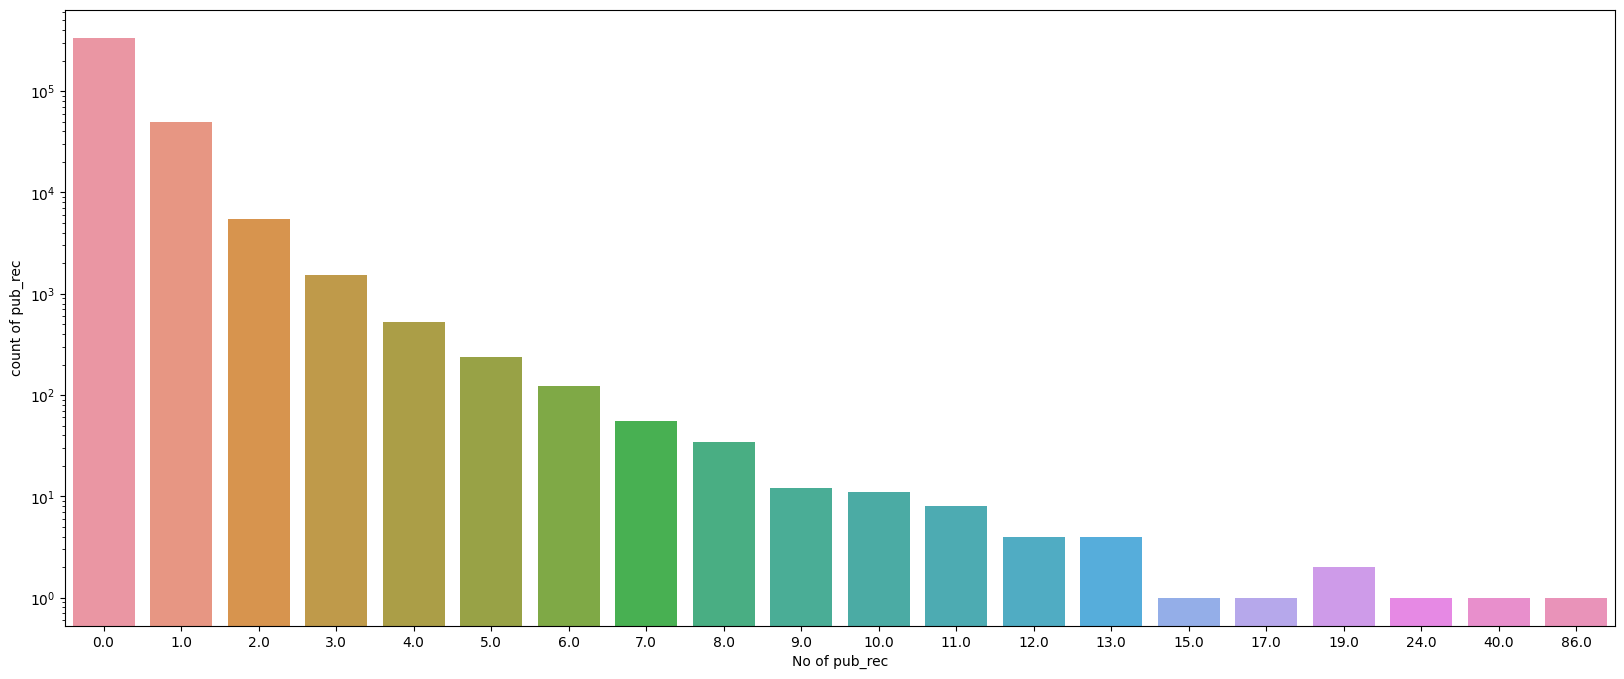

In [ ]:
plt.figure(figsize = (20,8))
sns.barplot(y = data["pub_rec"].value_counts().reset_index()["pub_rec"],
        x = data["pub_rec"].value_counts().reset_index()["index"])
plt.xlabel("No of pub_rec")
plt.ylabel("count of pub_rec")
plt.yscale('log')

<Axes: xlabel='loan_status', ylabel='pub_rec'>

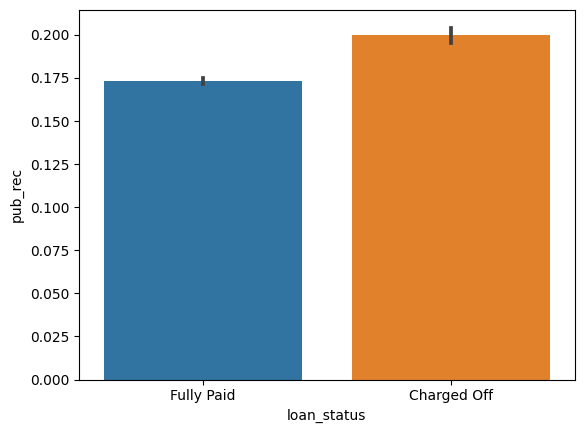

In [137]:
sns.barplot(data=data, x= "loan_status", y= "pub_rec", estimator  = np.mean)

* 85 % of borrowers have Zero derogatory public records
* However Rest 15% Borrowers have derogatory public records ranging from 1 ~ 86
* On an Average Public Derogatory Accounts are high for Charged Off Borrowers

### revol_bal

In [ ]:
data["revol_bal"].describe()

count    3.960300e+05
mean     1.584454e+04
std      2.059184e+04
min      0.000000e+00
25%      6.025000e+03
50%      1.118100e+04
75%      1.962000e+04
max      1.743266e+06
Name: revol_bal, dtype: float64

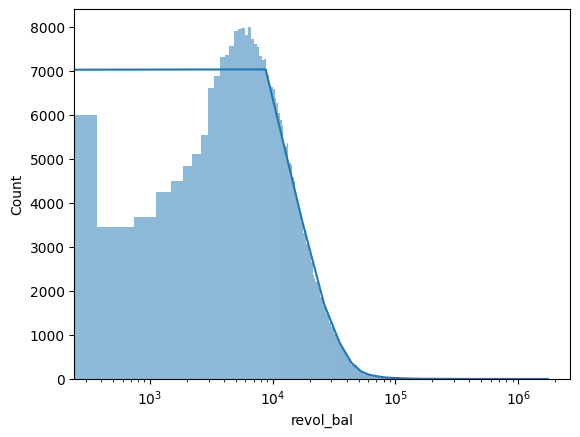

In [ ]:
sns.histplot(data["revol_bal"], kde = True)
plt.xscale("log")

<Axes: xlabel='loan_status', ylabel='revol_bal'>

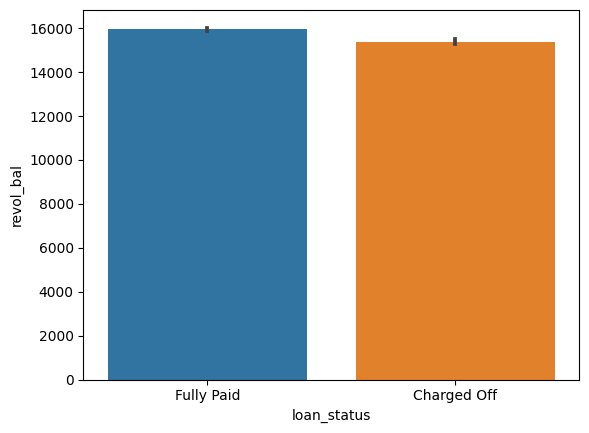

In [139]:
sns.barplot(data=data, x= "loan_status", y= "revol_bal", estimator  = np.mean)

* revol_bal range from 0 ~ 1,743,266
* But 75% of borrowers have revol_bal < 19,620
* On an Average, Total credit revolving balance is high for Fully Paid Borrowers

### revol_util

In [ ]:
data["revol_util"].describe()

count    395754.000000
mean         53.791749
std          24.452193
min           0.000000
25%          35.800000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64

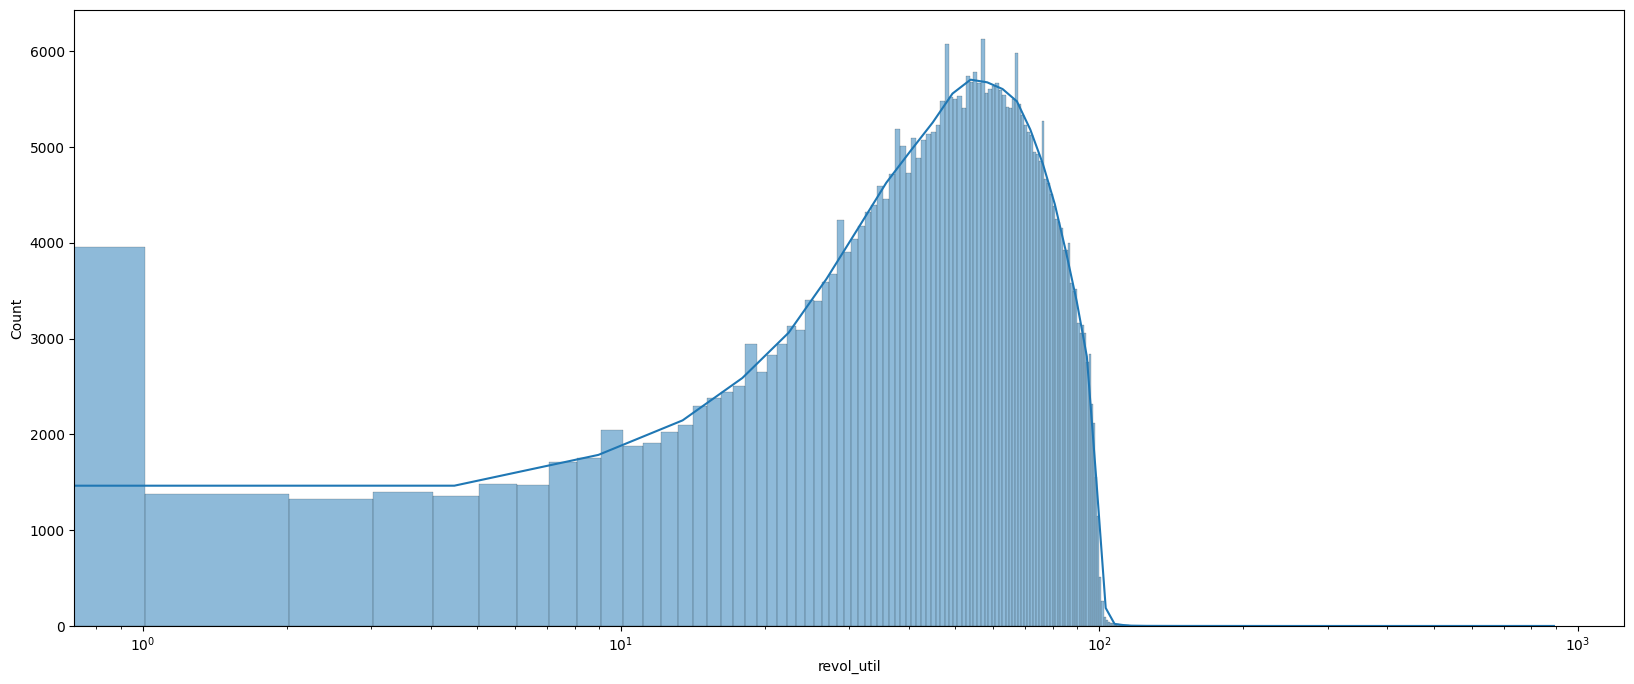

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(data["revol_util"], kde = True)
plt.xscale("log")

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


<Axes: xlabel='loan_status', ylabel='revol_util'>

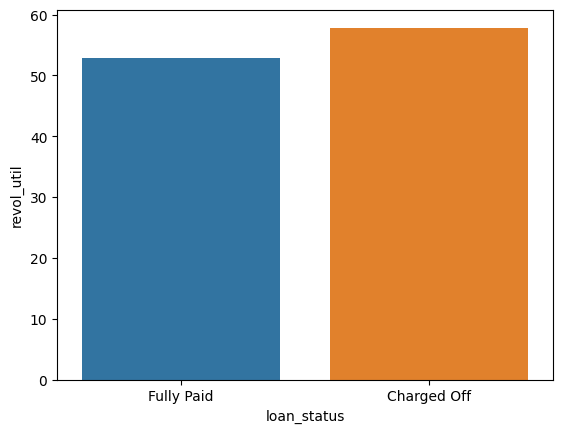

In [140]:
sns.barplot(data=data, x= "loan_status", y= "revol_util", estimator  = np.mean)

* revol_util range from 0 ~ 892%
* But 75% of borrowers have revol_util < 73%
* The amount of credit the borrower is using relative to all available revolving credit is high for Charged off Borrowers compared to Fully Paid Borrowers

### total_acc

In [ ]:
data["total_acc"].describe()

count    396030.000000
mean         25.414744
std          11.886991
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         151.000000
Name: total_acc, dtype: float64

<Axes: xlabel='total_acc', ylabel='Count'>

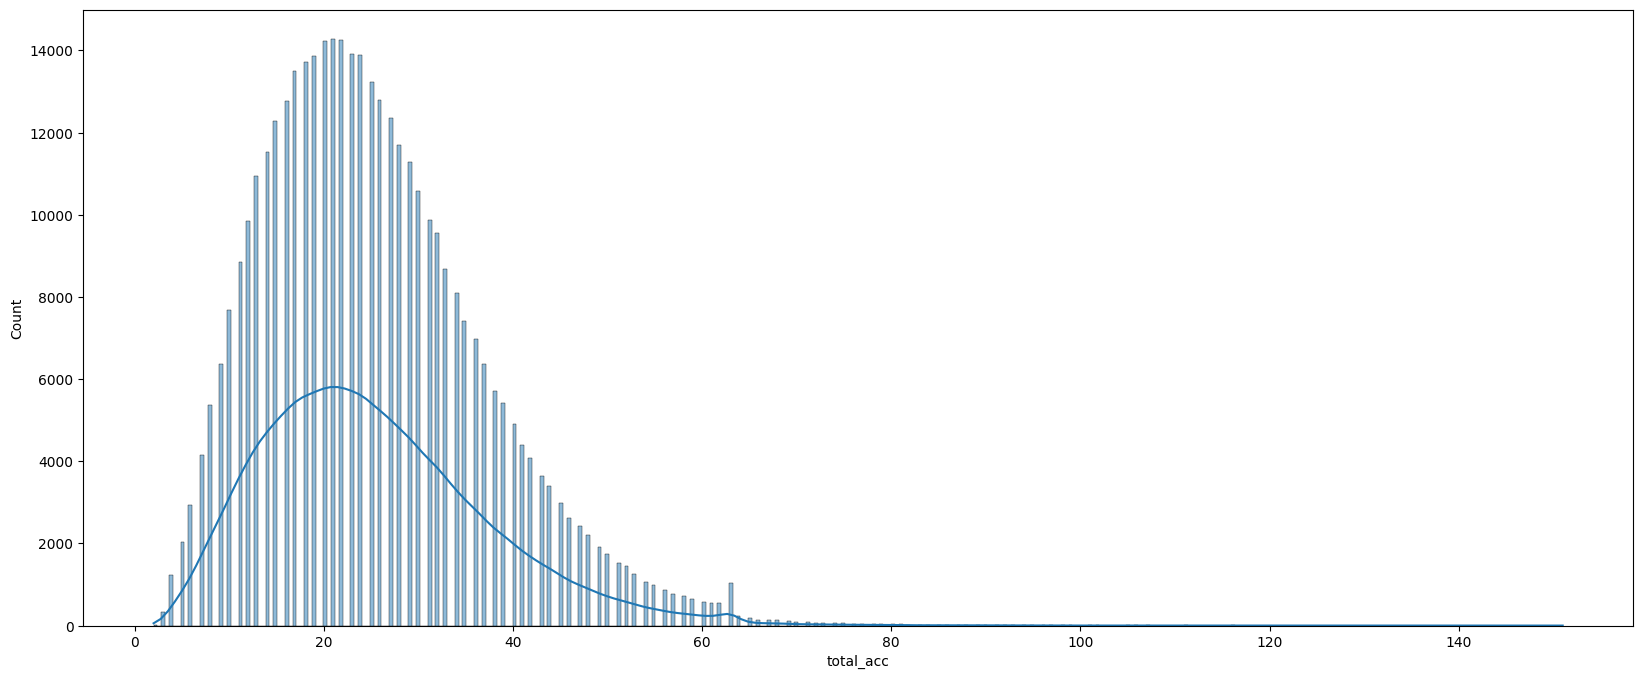

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(data["total_acc"],kde = True )

* Total number of credit lines in the borrower's credit file lies between 2 ~ 151
* However 75% of the Borrowers have total Credit lines < 32

* As such open_acc and total_acc individually has no interpretation
* Let us find Credit lines utilization factor by Diving Open_acc with Total_acc

In [141]:
data["open_acc_ratio"] = data["open_acc"]/data["total_acc"]

<Axes: xlabel='open_acc_ratio', ylabel='Count'>

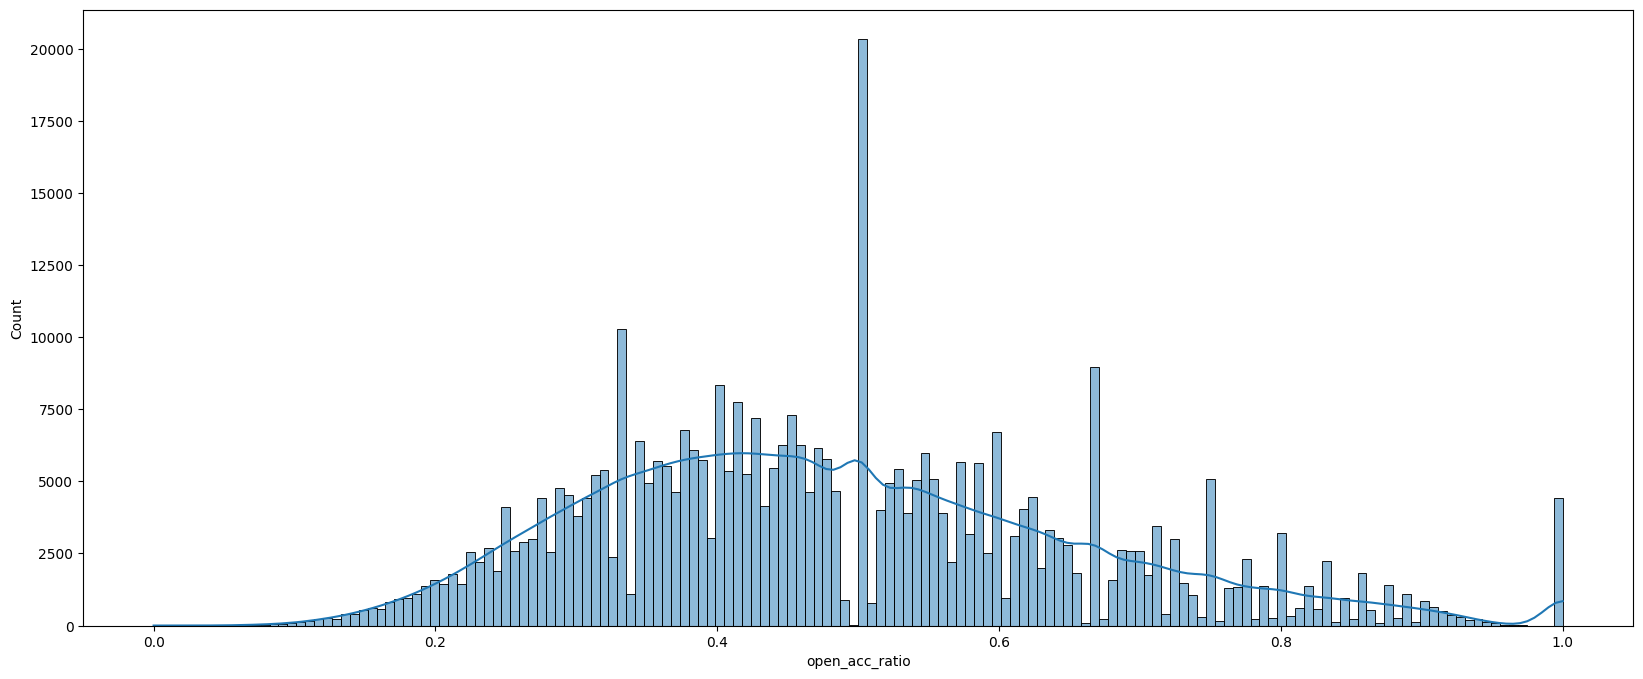

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(data["open_acc_ratio"],kde = True )

In [ ]:
data["open_acc_ratio"].describe()

count    396030.000000
mean          0.483716
std           0.173912
min           0.000000
25%           0.357143
50%           0.461538
75%           0.590909
max           1.000000
Name: open_acc_ratio, dtype: float64

<Axes: xlabel='loan_status', ylabel='open_acc_ratio'>

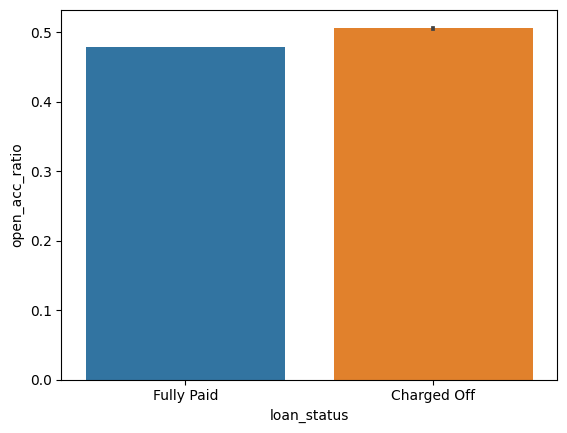

In [142]:
sns.barplot(data=data, x= "loan_status", y= "open_acc_ratio", estimator  = np.mean)

* As we can see Open Credit line ratio lies between 0~1 only
* 75% of borrowers have  Open Credit line ratio < 0.59
* No of Open Credit Line Percentage of all Crdit line is highest for Charged Off Borrowers


### initial_list_status


In [ ]:
data["initial_list_status"].value_counts()

f    238066
w    157964
Name: initial_list_status, dtype: int64

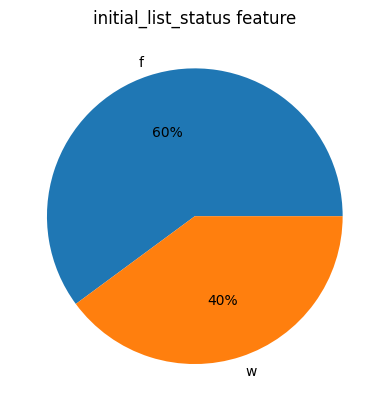

In [ ]:
plt.pie(x = data["initial_list_status"].value_counts().reset_index()["initial_list_status"],
        labels = data["initial_list_status"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("initial_list_status feature")
plt.show()

In [144]:
pd.crosstab(data["loan_status"],data["initial_list_status"],normalize = "columns")

initial_list_status,f,w
loan_status,,
Charged Off,0.19306,0.200755
Fully Paid,0.80694,0.799245


* 60% Borrowers have initial_list_status as f & rest 40% have w
* Initial_list_Statua has not Significance on Loan_Status

### application_type

In [ ]:
data["application_type"].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

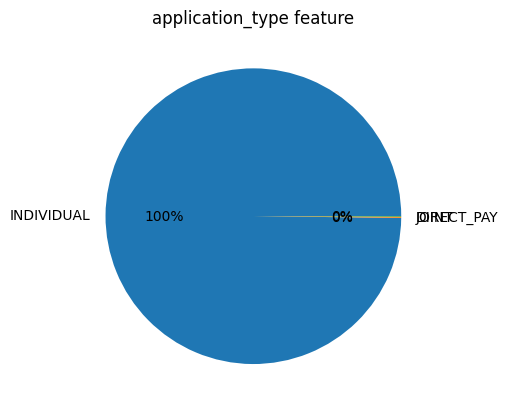

In [ ]:
plt.pie(x = data["application_type"].value_counts().reset_index()["application_type"],
        labels = data["application_type"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("application_type feature")
plt.show()

In [145]:
pd.crosstab(data["loan_status"],data["application_type"],normalize = "columns")

application_type,DIRECT_PAY,INDIVIDUAL,JOINT
loan_status,,,
Charged Off,0.356643,0.196087,0.127059
Fully Paid,0.643357,0.803913,0.872941


* Most of the Applicants area Individuals
* Joint Application type has less propability of Charged Off and Direct_pay has Highest propability of Charged off

### mort_acc

In [ ]:
data["mort_acc"].describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

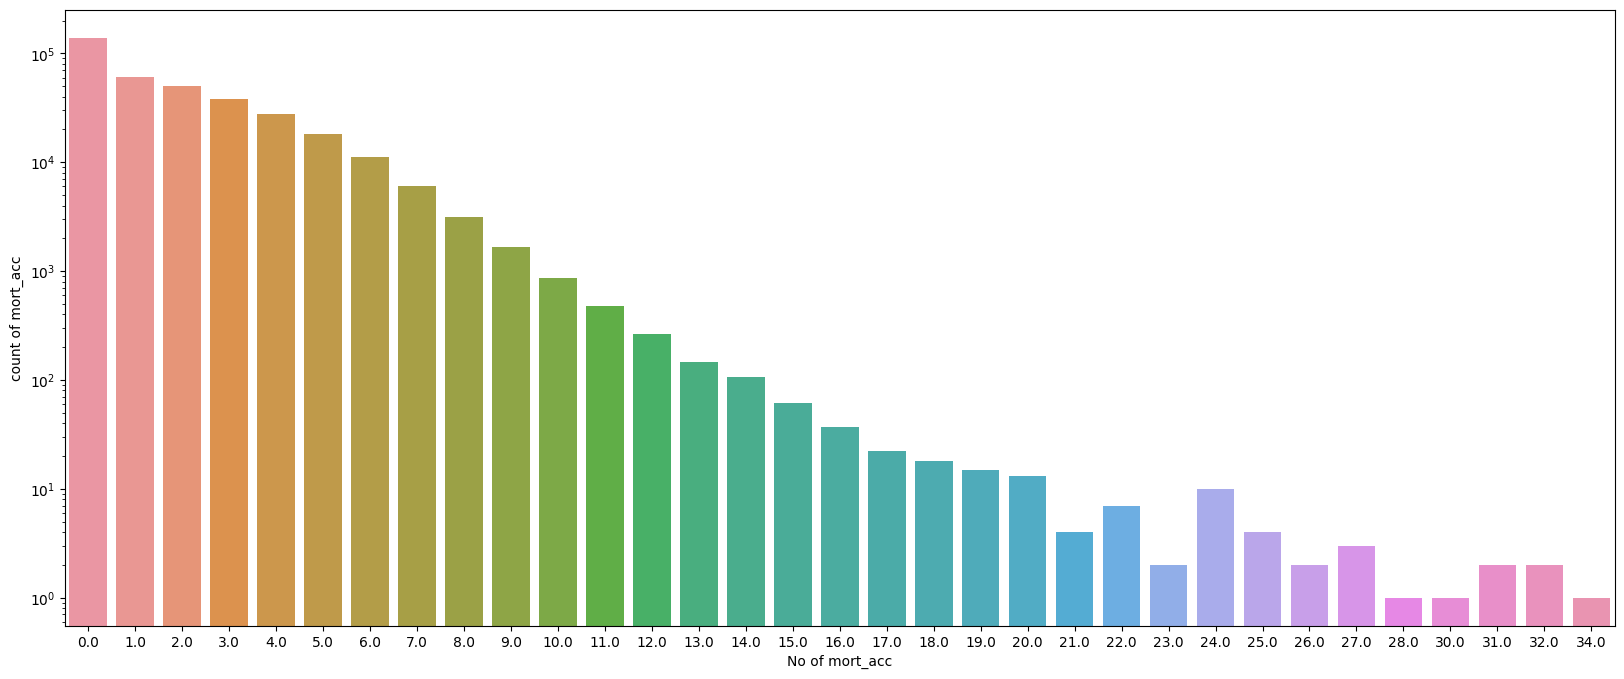

In [ ]:
plt.figure(figsize = (20,8))
sns.barplot(y = data["mort_acc"].value_counts().reset_index()["mort_acc"],
        x = data["mort_acc"].value_counts().reset_index()["index"])
plt.xlabel("No of mort_acc")
plt.ylabel("count of mort_acc")
plt.yscale('log')

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


<Axes: xlabel='loan_status', ylabel='mort_acc'>

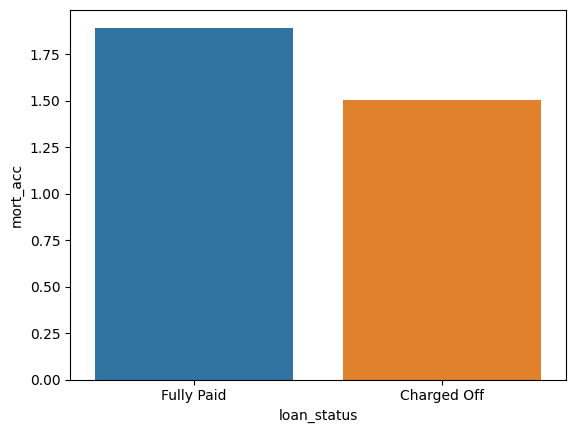

In [147]:
sns.barplot(data=data, x= "loan_status", y= "mort_acc", estimator  = np.mean)

* mort_acc range from 0 ~ 34
* 75% of loan applicants have mortage accounts < =3
* On an Average Mortage_account High for Fully Paid Borrowers

### pub_rec_bankruptcies

In [ ]:
data["pub_rec_bankruptcies"].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

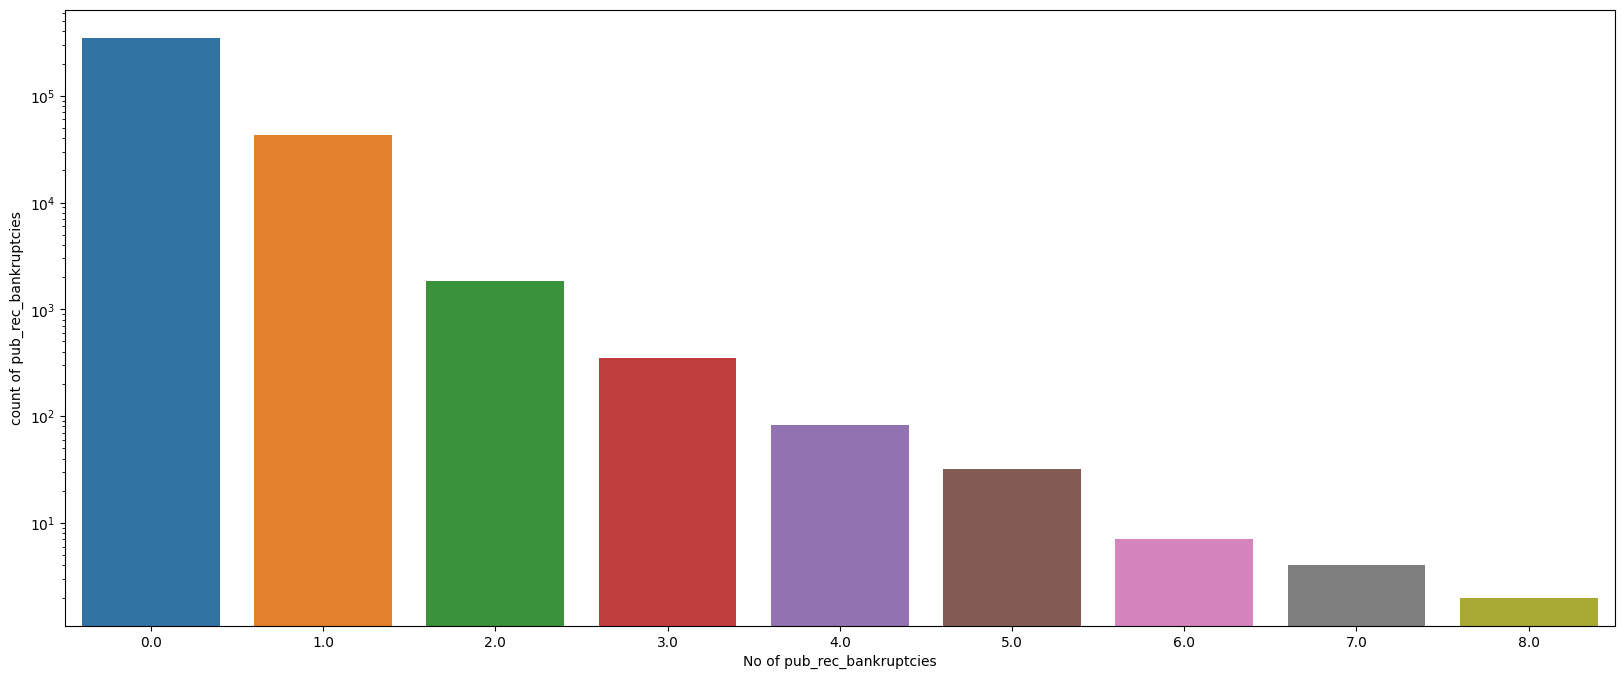

In [ ]:
plt.figure(figsize = (20,8))
sns.barplot(y = data["pub_rec_bankruptcies"].value_counts().reset_index()["pub_rec_bankruptcies"],
        x = data["pub_rec_bankruptcies"].value_counts().reset_index()["index"])
plt.xlabel("No of pub_rec_bankruptcies")
plt.ylabel("count of pub_rec_bankruptcies")
plt.yscale('log')

In [ ]:
data["pub_rec_bankruptcies"].describe()

count    395495.000000
mean          0.121648
std           0.356174
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: pub_rec_bankruptcies, dtype: float64

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


<Axes: xlabel='loan_status', ylabel='pub_rec_bankruptcies'>

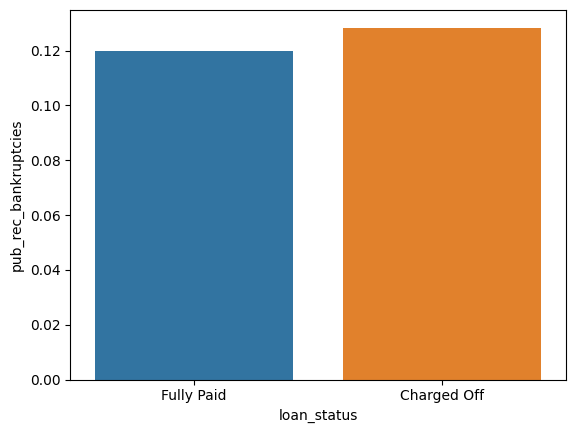

In [148]:
sns.barplot(data=data, x= "loan_status", y= "pub_rec_bankruptcies", estimator  = np.mean)

* 88% Applicants have "0" pub_rec_bankruptcies
* Load Chargedd off Borrowers have high pub_rec_bankruptcies

### Address

In [ ]:
data["address"].value_counts()

USCGC Smith\r\nFPO AE 70466                           8
USS Johnson\r\nFPO AE 48052                           8
USNS Johnson\r\nFPO AE 05113                          8
USS Smith\r\nFPO AP 70466                             8
USNS Johnson\r\nFPO AP 48052                          7
                                                     ..
455 Tricia Cove\r\nAustinbury, FL 00813               1
7776 Flores Fall\r\nFernandezshire, UT 05113          1
6577 Mia Harbors Apt. 171\r\nRobertshire, OK 22690    1
8141 Cox Greens Suite 186\r\nMadisonstad, VT 05113    1
787 Michelle Causeway\r\nBriannaton, AR 48052         1
Name: address, Length: 393700, dtype: int64

In [ ]:
data["address"].nunique()

393700

* Let us split the Address into Place, State & Code
* We will the remove Initial Detailed address of each individual as it is very detailed and unique for Each borrower
* we will use Place, State & Code for our Logistic Model

In [12]:
data["address"]=data["address"].apply(lambda x : x.split("\r\n")[-1] )

In [ ]:
data["address"].head()

0     Mendozaberg, OK 22690
1      Loganmouth, SD 05113
2     New Sabrina, WV 05113
3    Delacruzside, MA 00813
4      Greggshire, VA 11650
Name: address, dtype: object

In [13]:
data["address_place"]=data["address"].apply(lambda x : x.split(",")[0] )
data["address_state"]=data["address"].apply(lambda x : x.split()[1] )
data["address_code"]=data["address"].apply(lambda x : x.split()[2] )

In [ ]:
data["address_place"].nunique()

67600

In [ ]:
data["address_state"].nunique()

11409

In [ ]:
data["address_code"].nunique()

61

In [ ]:
data["address"].nunique()

342494

* BY splitting the Address Columns, we were able to reduce 393700 --> 67600 address_Places, 11409 Adress_States, 61 address_Codes

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  object        
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  object        
 5   sub_grade             396030 non-null  object        
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  object        
 8   home_ownership        396030 non-null  object        
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  object        
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  object        
 13 

# **Data Overview & Cleaning**

## Dropping Irrelevant columns

In [ ]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'issue_month',
       'issue_year', 'Borrowing_hist', 'open_acc_ratio', 'address_place',
       'address_state', 'address_code'],
      dtype='object')

In [17]:
data.drop(["issue_d","earliest_cr_line","open_acc","total_acc","address","emp_title","title"], axis = 1,inplace= True)

In [ ]:
data.shape

(396030, 27)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  

## Duplicate Values & Their Treatment

In [19]:
data.loc[data.duplicated()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,application_type,mort_acc,pub_rec_bankruptcies,issue_month,issue_year,open_acc_ratio,address_place,address_state,address_code,Borrowing_hist


No duplicate rows found

## Missingvalues & Their Treatment

In [20]:
data.isna().sum(axis = 0)

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
pub_rec                     0
revol_bal                   0
revol_util                276
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
issue_month                 0
issue_year                  0
open_acc_ratio              0
address_place               0
address_state               0
address_code                0
Borrowing_hist              0
dtype: int64

### emp_length

In [21]:
data["emp_length"].isnull().sum(axis = 0)

18301

* We will fill the Null values with Unkown Length
* Later on , we will use Target Encoders with "loan_status" target as to convert all Categories of emp_length into numericals

In [22]:
data["emp_length"].fillna("Unknown", inplace = True)

In [23]:
data["emp_length"].isnull().sum(axis = 0)

0

* No Missing values present in emp_length

### revol_util,mort_acc,pub_rec_bankruptcies

* As all above three are Numericals, we will will use Median Values to Fill the Null values

In [24]:
data["revol_util"].fillna(data["revol_util"].median(), inplace = True)
data["mort_acc"].fillna(data["mort_acc"].median(), inplace = True)
data["pub_rec_bankruptcies"].fillna(data["pub_rec_bankruptcies"].median(), inplace = True)

In [25]:
data.isna().sum(axis = 0).sum()

0

* All Null Values have been Filled

## Flag Creation

* pub_rec
* mort_acc
* pub_rec_bankruptcies

In [26]:
data["pub_rec"]= data["pub_rec"].apply(lambda x : 1 if x>1 else 0)
data["mort_acc"]= data["mort_acc"].apply(lambda x : 1 if x>1 else 0)
data["pub_rec_bankruptcies"]= data["pub_rec_bankruptcies"].apply(lambda x : 1 if x>1 else 0)

In [27]:
data["pub_rec_bankruptcies"].value_counts()

0    393705
1      2325
Name: pub_rec_bankruptcies, dtype: int64

In [28]:
data["pub_rec"].value_counts()

0    388011
1      8019
Name: pub_rec, dtype: int64

In [29]:
data["mort_acc"].value_counts()

0    237988
1    158042
Name: mort_acc, dtype: int64

## Datatype Conversion of Features

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            396030 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  pub_rec               396030 non-null  int64  
 14  revol_bal             396030 non-null  float64
 15  

* There are many Object Data Type, we will convert them into Category Data Type

In [31]:
catlist = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','loan_status',
           'purpose','initial_list_status', 'application_type', 'issue_month', 'issue_year',
           'mort_acc','pub_rec_bankruptcies', 'pub_rec',"address_place","address_state","address_code"]

In [32]:
numlist = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal',
       'revol_util','Borrowing_hist', 'open_acc_ratio']

In [33]:
for i in catlist:
  data[i].astype("category")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            396030 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  dti                   396030 non-null  float64
 13  pub_rec               396030 non-null  int64  
 14  revol_bal             396030 non-null  float64
 15  

# **Finding & Treating Outliers Using IQR**

## IQR Analysis and Outlier Finding

* We will create a new Dataframe " outlier" which store Boolean value of IQR Analysis Result for each reading of all numerical feature columns

In [34]:
# Finding outlier for all Numerical features
outlier = pd.DataFrame() # creating as new dataframe to store outliers for each numerical feature
for z in numlist:
    print(z,"Feature")
    print("*******************************************************************")
    IQR = np.percentile(data[z],75) - np.percentile(data[z],25)
    lower_limit = max (np.percentile(data[z],25) - 1.5*IQR,0)
    upper_limit = np.percentile(data[z],75) + 1.5*IQR
    outlier[z] = (data[z]>upper_limit) | (data[z]<lower_limit)

    print("Minimum -->",data[z].min())
    print("Lower Limit -->",lower_limit)
    print("Quantile25 -->",np.percentile(data[z],25))
    print("Median -->",np.percentile(data[z],50))
    print("Quantile75 -->",np.percentile(data[z],75))
    print("Upper Limit -->",upper_limit)
    print("Maximum -->",data[z].max())

    print()
    print("Out of ",len(data[z]), "Data points , There are",outlier[z].sum(),"Outliers")
    print("Percentage of Outliers:",np.round((outlier[z].sum()/len(data[z])*100),2),"%")
    print()
    print("*******************************************************************")

loan_amnt Feature
*******************************************************************
Minimum --> 500.0
Lower Limit --> 0
Quantile25 --> 8000.0
Median --> 12000.0
Quantile75 --> 20000.0
Upper Limit --> 38000.0
Maximum --> 40000.0

Out of  396030 Data points , There are 191 Outliers
Percentage of Outliers: 0.05 %

*******************************************************************
int_rate Feature
*******************************************************************
Minimum --> 5.32
Lower Limit --> 1.4900000000000038
Quantile25 --> 10.49
Median --> 13.33
Quantile75 --> 16.49
Upper Limit --> 25.489999999999995
Maximum --> 30.99

Out of  396030 Data points , There are 3777 Outliers
Percentage of Outliers: 0.95 %

*******************************************************************
installment Feature
*******************************************************************
Minimum --> 16.08
Lower Limit --> 0
Quantile25 --> 250.33
Median --> 375.43
Quantile75 --> 567.3
Upper Limit --> 1042.75499999

## Box-Plot for Outlier Visualization

* Let us visualize the outliers with Box plot

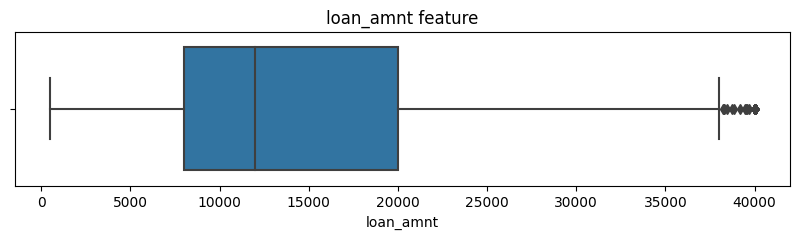

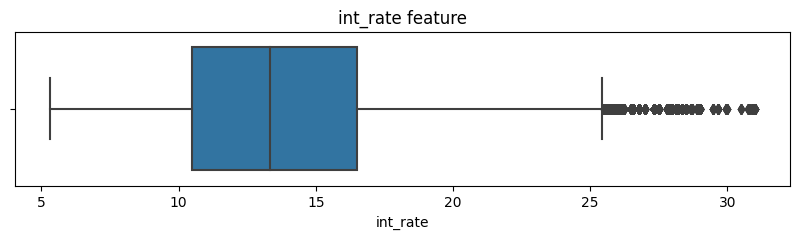

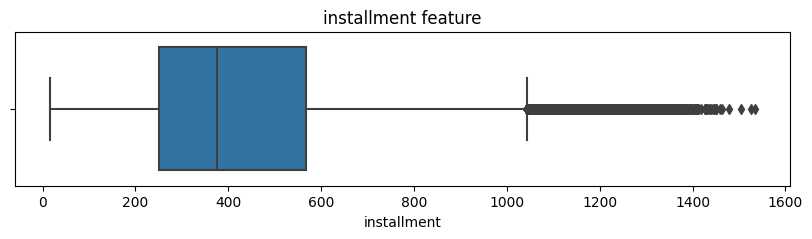

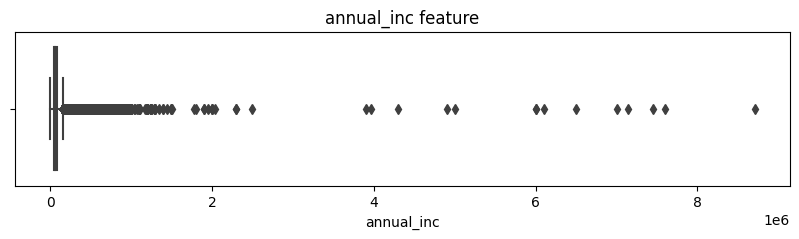

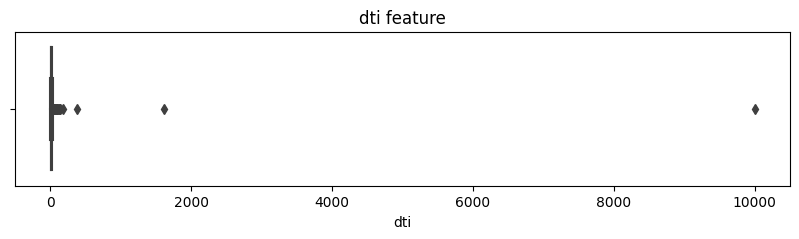

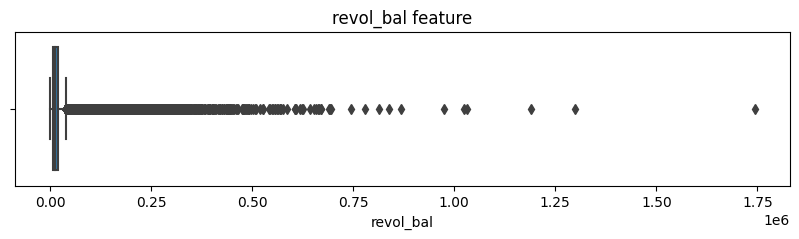

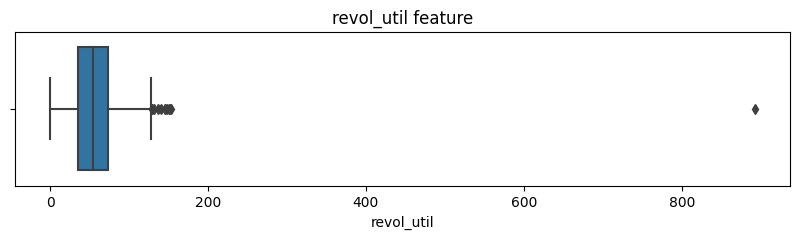

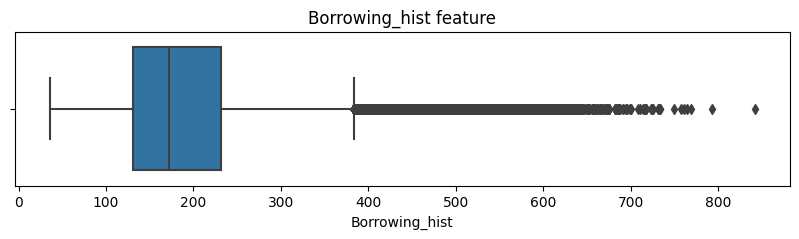

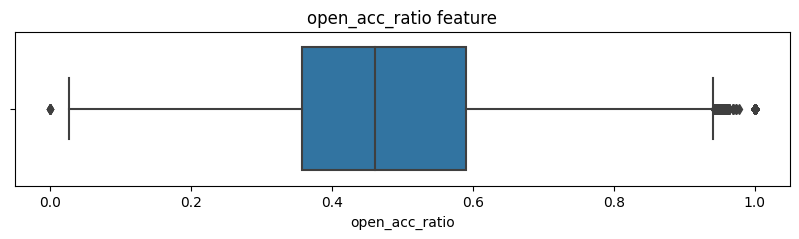

In [35]:
for z in numlist:
  plt.figure(figsize=(10,2))
  sns.boxplot(data= data, x = z)
  plt.title(z+" feature")

## Outlier Treatment

* From above graph we can see all the Numerical Features have outliers
* But Some of the Outliers have Relevance , so we will not treat all the outlier
* These Feature [ 'loan_amnt', 'int_rate', 'installment', 'open_acc_ratio'] -->  we will keep as they are and not treat them
* We will treat these features ['annual_inc', 'dti', 'revol_bal' 'revol_util','Borrowing_hist'] and cap the outlier to Lower and Upper Limit Values

In [36]:
outlier.head()

,loan_amnt,int_rate,installment,annual_inc,dti,revol_bal,revol_util,Borrowing_hist,open_acc_ratio
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [37]:
for z in ['annual_inc', 'dti', 'revol_bal','revol_util','Borrowing_hist']:
  UL = np.percentile(data[z],75)+ 1.5*(np.percentile(data[z],75) - np.percentile(data[z],25))
  data.loc[outlier[z],z] = UL

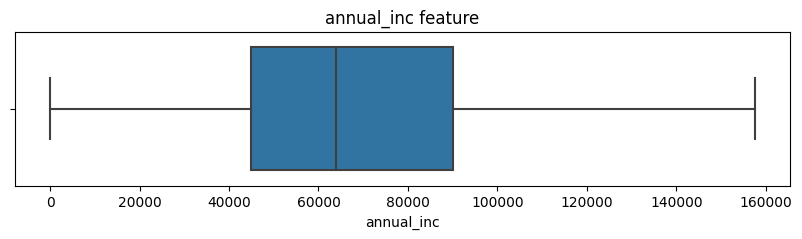

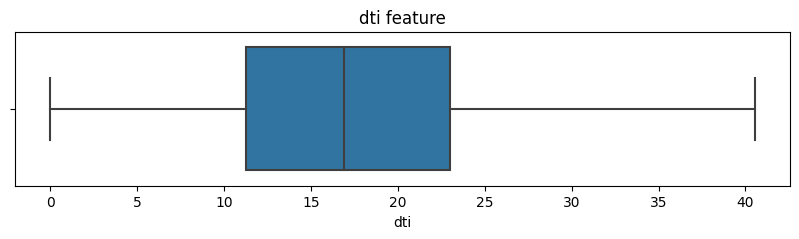

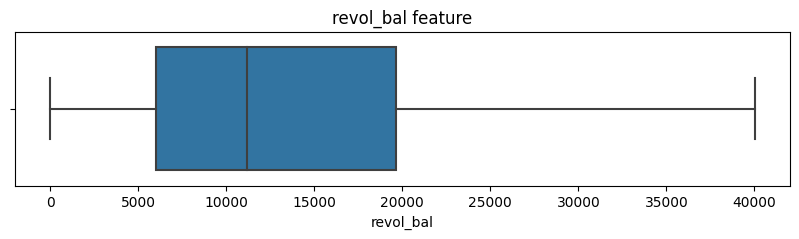

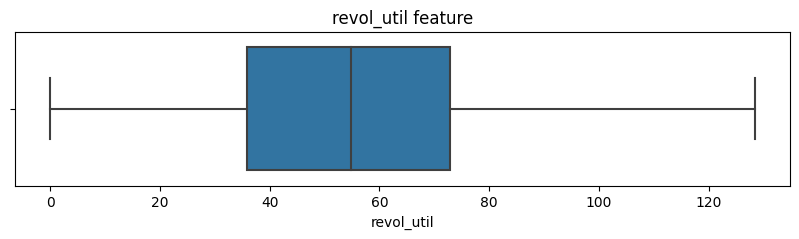

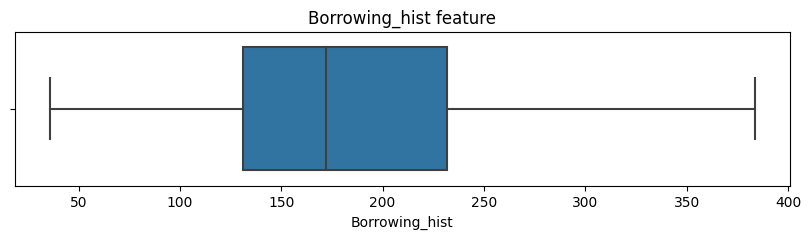

In [38]:
for z in ['annual_inc', 'dti', 'revol_bal','revol_util','Borrowing_hist']:
  plt.figure(figsize=(10,2))
  sns.boxplot(data= data, x = z)
  plt.title(z+" feature")

All the Required Outliers have been Capped with Upper Limit Values for Respective Features

# **Feature Engineering**

## Eliminate Reduntant features

* No Reduntant Feature available,
* From Hypothesis Testing we can say all feature are useful Predictor of "Chance of Admit"

## Encoding : Non-Numerical to Numerical

In [39]:
data[catlist].nunique()

term                        2
grade                       7
sub_grade                  35
emp_length                 12
home_ownership              6
verification_status         3
loan_status                 2
purpose                    14
initial_list_status         2
application_type            3
issue_month                12
issue_year                 10
mort_acc                    2
pub_rec_bankruptcies        2
pub_rec                     2
address_place           67600
address_state           11409
address_code               61
dtype: int64

In [40]:
data[numlist].nunique()

loan_amnt          1397
int_rate            566
installment       55706
annual_inc        25919
dti                4018
revol_bal         38808
revol_util         1215
Borrowing_hist     1482
open_acc_ratio     1474
dtype: int64

* First Let Encode our Target Variable

In [41]:
data["loan_status"].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [42]:
data['loan_status'] = data['loan_status'].map({'Fully Paid': 1,
'Charged Off': 0})

In [43]:
data["loan_status"].value_counts()

1    318357
0     77673
Name: loan_status, dtype: int64

Now let encode rest of the Categorical Features

* we will follow below encoding Strategy for rest of categorical features
* if Feature wise unique Value[n]
** n<=2 --> LabelEncoder
** 3<= n <=5 --> One Hot Encoding
** n >5 -->Target Encoding

In [44]:
le=LabelEncoder()
te=TargetEncoder()

In [45]:
for i in catlist:
  if data[i].nunique() <= 2:
    data[i]=le.fit_transform(data[i])
  elif 3<= data[i].nunique() and data[i].nunique() <= 5:
    data=pd.get_dummies(data, columns = [i])
  elif data[i].nunique() > 5:
    data[i]=te.fit_transform(data[i],data["loan_status"])

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   grade                                396030 non-null  float64
 5   sub_grade                            396030 non-null  float64
 6   emp_length                           396030 non-null  float64
 7   home_ownership                       396030 non-null  float64
 8   annual_inc                           396030 non-null  float64
 9   loan_status                          396030 non-null  int64  
 10  purpose                              396030 non-null  float64
 11  dti          

In [ ]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,...,open_acc_ratio,address_place,address_state,address_code,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,0,11.44,329.48,0.874270,0.861607,0.815814,0.773378,117000.0,1,...,0.640000,0.813005,0.808696,0.806595,1,0,0,0,1,0
1,8000.0,0,11.99,265.68,0.874270,0.844963,0.807615,0.830439,65000.0,1,...,0.629630,0.746817,0.802448,1.000000,1,0,0,0,1,0
2,15600.0,0,10.49,506.97,0.874270,0.876646,0.793128,0.773378,43057.0,1,...,0.500000,0.761755,0.808079,0.796986,0,1,0,0,1,0
3,7200.0,0,6.49,220.65,0.937121,0.951814,0.810806,0.773378,54000.0,1,...,0.461538,0.834166,0.799372,1.000000,1,0,0,0,1,0
4,24375.0,1,17.27,609.33,0.788191,0.754933,0.799530,0.830439,55000.0,0,...,0.302326,0.699281,0.810544,0.000000,0,0,1,0,1,0


## Scaling of Numerical Categories

In [ ]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'purpose',
       'dti', 'pub_rec', 'revol_bal', 'revol_util', 'initial_list_status',
       'mort_acc', 'pub_rec_bankruptcies', 'issue_month', 'issue_year',
       'Borrowing_hist', 'open_acc_ratio', 'address_place', 'address_state',
       'address_code', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_DIRECT_PAY', 'application_type_INDIVIDUAL',
       'application_type_JOINT'],
      dtype='object')

* Let us do KS test for Goodness of Fit to check for  Normal Distribution in order to decide the type of scaler ot be used [ Minmax or Standard Scaler]

In [47]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in numlist:
  test_stat, p_value = kstest(data[i],stats.norm.cdf)
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(i,"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(i,"Data is Gaussian")
  print()

0.0
Reject H0
loan_amnt Data is Not Gaussian

0.0
Reject H0
int_rate Data is Not Gaussian

0.0
Reject H0
installment Data is Not Gaussian

0.0
Reject H0
annual_inc Data is Not Gaussian

0.0
Reject H0
dti Data is Not Gaussian

0.0
Reject H0
revol_bal Data is Not Gaussian

0.0
Reject H0
revol_util Data is Not Gaussian

0.0
Reject H0
Borrowing_hist Data is Not Gaussian

0.0
Reject H0
open_acc_ratio Data is Not Gaussian



* we have observed that All the Numericals are not following Normal Distribution, so we cannot do Standardization
* Now we will do Normalization using Minmax Scaler



In [48]:
Normscaler = MinMaxScaler()

In [49]:
scaleddata = Normscaler.fit_transform(data)

In [50]:
scaleddata

array([[0.24050633, 0.        , 0.2384106 , ..., 0.        , 1.        ,
        0.        ],
       [0.18987342, 0.        , 0.25983638, ..., 0.        , 1.        ,
        0.        ],
       [0.38227848, 0.        , 0.20140242, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.11392405, 0.        , 0.18192443, ..., 0.        , 1.        ,
        0.        ],
       [0.51898734, 1.        , 0.38917024, ..., 0.        , 1.        ,
        0.        ],
       [0.03797468, 0.        , 0.32294507, ..., 0.        , 1.        ,
        0.        ]])

In [51]:
scaleddata = pd.DataFrame(scaleddata,columns = data.columns)

In [52]:
scaleddata

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,...,address_place,address_state,address_code,Borrowing_hist,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
0,0.240506,0.0,0.238411,0.206493,0.848736,0.772465,1.000000,0.000000,0.742857,1.0,...,0.813005,0.635463,0.806595,0.745309,1.0,0.0,0.0,0.0,1.0,0.0
1,0.189873,0.0,0.259836,0.164456,0.848736,0.737947,0.910003,0.681255,0.412698,1.0,...,0.746817,0.617450,1.000000,0.259086,1.0,0.0,0.0,0.0,1.0,0.0
2,0.382278,0.0,0.201402,0.323437,0.848736,0.803653,0.750981,0.000000,0.273378,1.0,...,0.761754,0.633686,0.796986,0.152654,0.0,1.0,0.0,0.0,1.0,0.0
3,0.169620,0.0,0.045578,0.134787,1.000000,0.959540,0.945024,0.000000,0.342857,1.0,...,0.834166,0.608584,1.000000,0.178458,1.0,0.0,0.0,0.0,1.0,0.0
4,0.604430,1.0,0.465524,0.390880,0.641573,0.551238,0.821250,0.681255,0.349206,0.0,...,0.699280,0.640791,0.000000,0.382816,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0.240506,1.0,0.220880,0.132632,0.848736,0.772465,0.900373,0.000000,0.253968,1.0,...,0.803165,0.637018,0.804398,0.273264,0.0,1.0,0.0,0.0,1.0,0.0
396026,0.518987,0.0,0.271523,0.450897,0.641573,0.699251,0.912172,0.681255,0.698413,1.0,...,0.791657,0.644606,1.000000,0.207193,0.0,1.0,0.0,0.0,1.0,0.0
396027,0.113924,0.0,0.181924,0.095696,0.848736,0.855027,1.000000,0.000000,0.358730,1.0,...,0.802409,0.663766,0.804787,0.469115,0.0,0.0,1.0,0.0,1.0,0.0
396028,0.518987,1.0,0.389170,0.320834,0.641573,0.649844,1.000000,0.681255,0.406349,1.0,...,0.811847,0.627352,0.804248,0.647384,0.0,0.0,1.0,0.0,1.0,0.0


In [53]:
scaleddata.describe()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,...,address_place,address_state,address_code,Borrowing_hist,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
count,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,...,396030.000000,396030.000000,396030.000000,396030.000000,396030.00000,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000
mean,0.344655,0.237419,0.324090,0.273942,0.679309,0.652728,0.868902,0.364049,0.450727,0.803871,...,0.803907,0.621534,0.803871,0.434466,0.31584,0.331755,0.352405,0.000722,0.998205,0.001073
std,0.211581,0.425502,0.174217,0.165199,0.246440,0.217231,0.205791,0.324865,0.217909,0.397068,...,0.093904,0.073134,0.193645,0.230663,0.46485,0.470844,0.477720,0.026864,0.042333,0.032741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.189873,0.000000,0.201402,0.154342,0.456573,0.512382,0.835911,0.000000,0.285714,1.000000,...,0.782117,0.603757,0.801560,0.273359,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.291139,0.000000,0.312037,0.236768,0.641573,0.699251,0.900373,0.681255,0.406349,1.000000,...,0.809699,0.623020,0.804787,0.391417,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.493671,0.000000,0.435138,0.363187,0.848736,0.834432,1.000000,0.681255,0.571429,1.000000,...,0.834166,0.640791,0.808752,0.564015,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


## Bivariate - Correlation Matrix

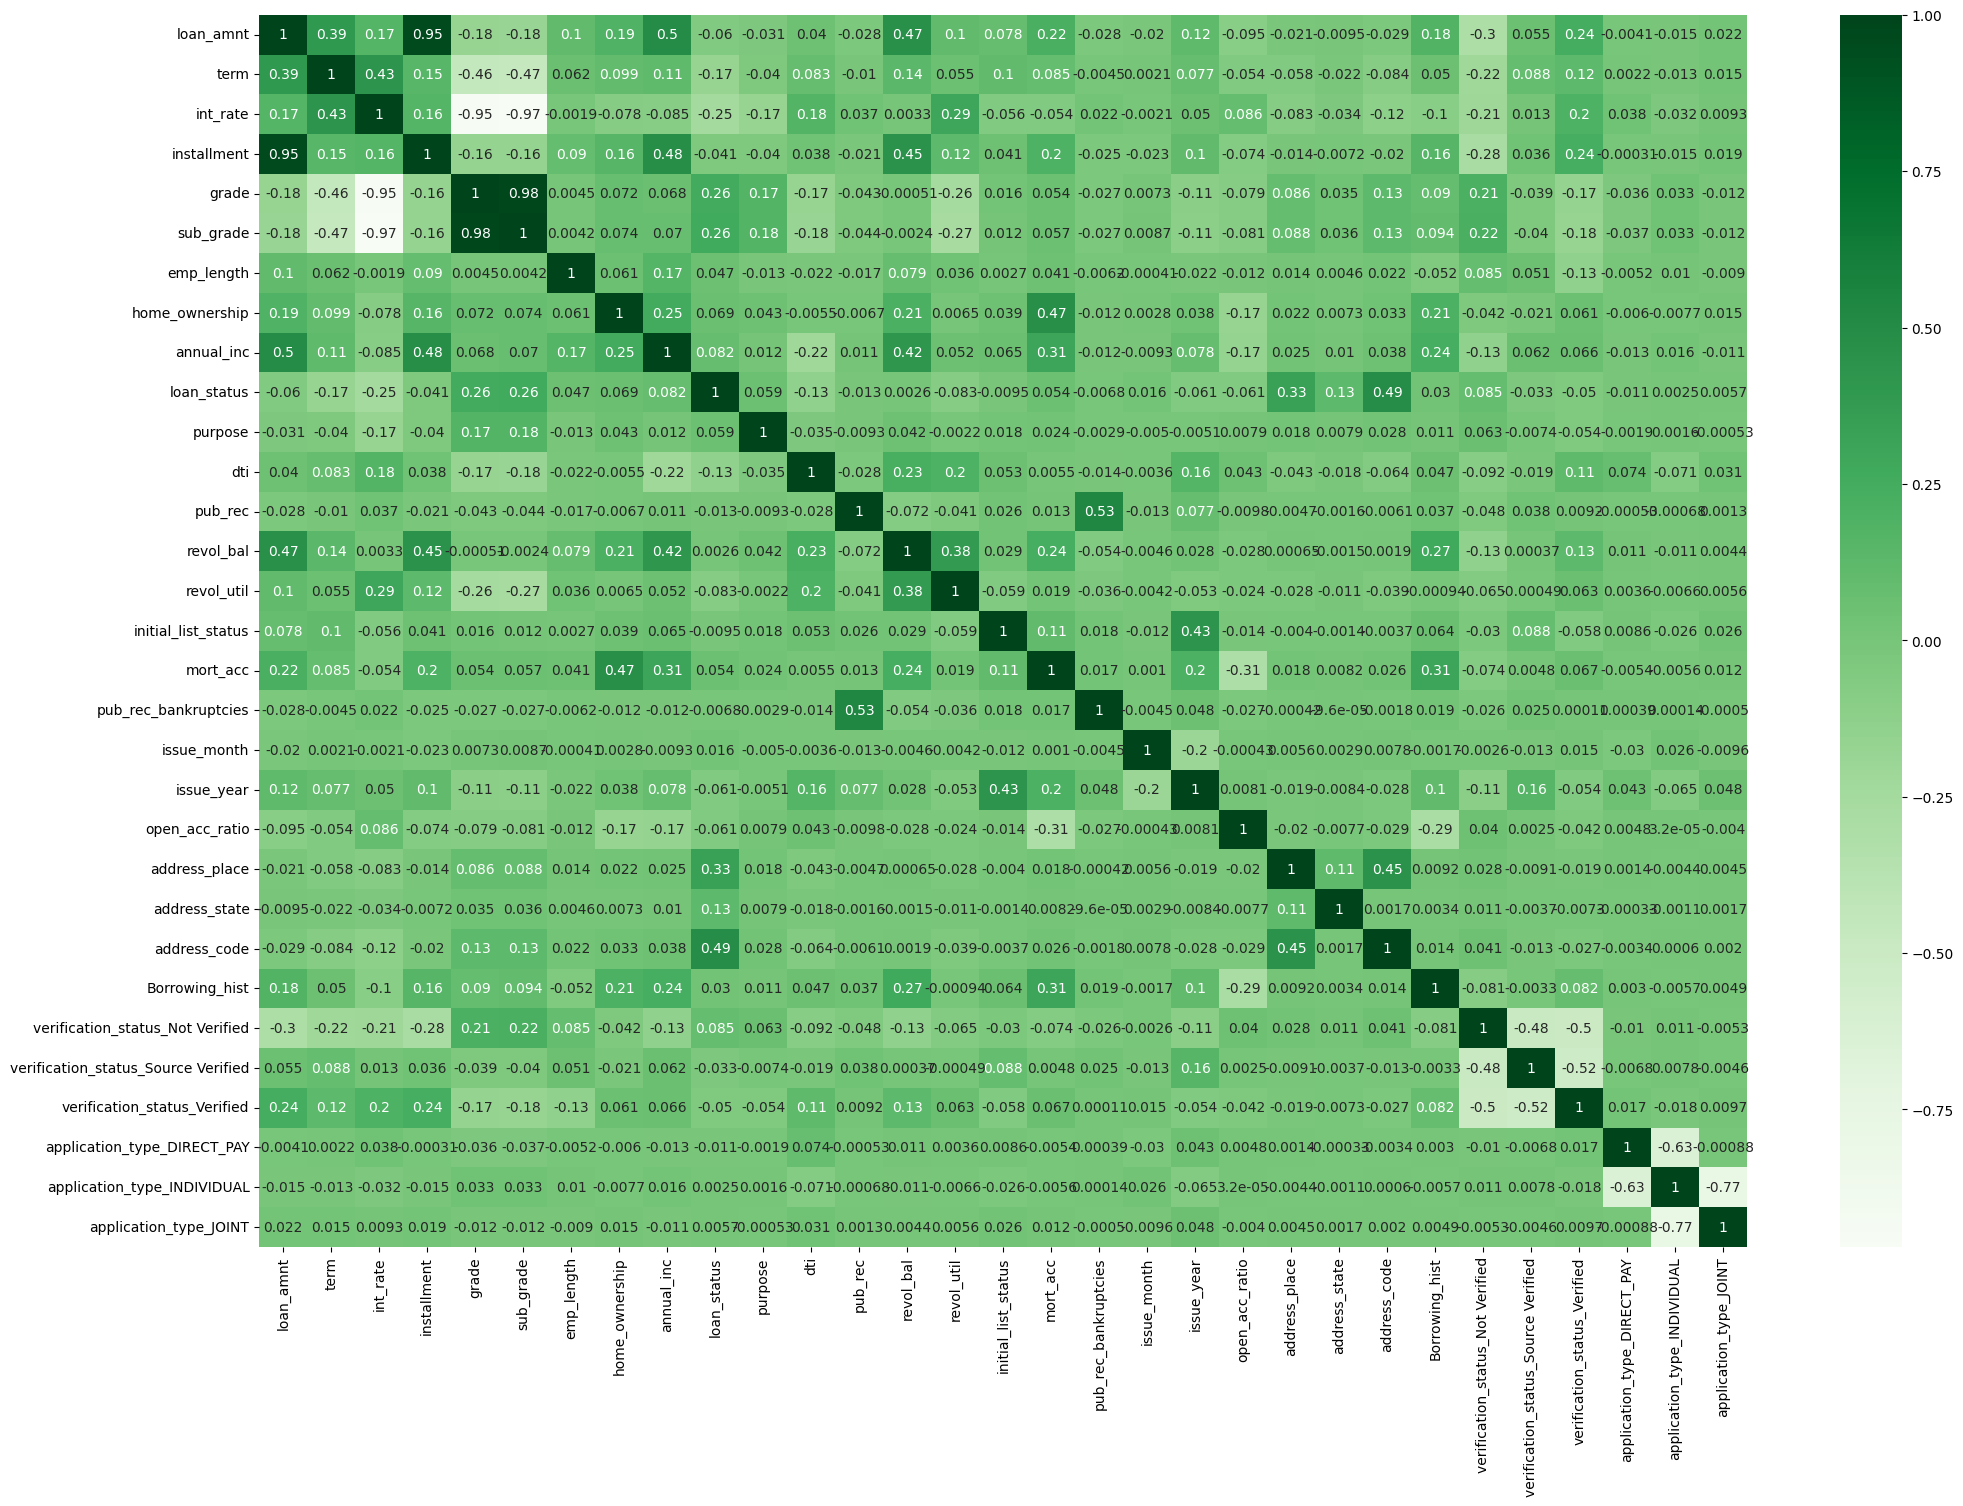

In [89]:
plt.figure(figsize =(24,16))
sns.heatmap(data.corr(),annot=True,cmap = "Greens")
plt.show()

* Address Code and Adress Place has high Correlation with Loan_Status

## Final data - Dividing Data for Training & Test

* Our desired Outcome is "loan_status"
* So we will divide our scaleddata into X,y
* we will use 80:20 ratio for train & test
* Further we will Divide X & y as below data sets
** Xtrain
** Xtest
** ytrain
** ytest

In [54]:
Xtrain, Xtest, ytrain, ytest = train_test_split(scaleddata.drop(["loan_status"], axis = 1), scaleddata["loan_status"], test_size=0.2, random_state=32)

In [55]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((316824, 30), (79206, 30), (316824,), (79206,))

# **Hypothesis Testing**

In [90]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'purpose',
       'dti', 'pub_rec', 'revol_bal', 'revol_util', 'initial_list_status',
       'mort_acc', 'pub_rec_bankruptcies', 'issue_month', 'issue_year',
       'open_acc_ratio', 'address_place', 'address_state', 'address_code',
       'Borrowing_hist', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_DIRECT_PAY', 'application_type_INDIVIDUAL',
       'application_type_JOINT'],
      dtype='object')

* In this Data Differet test [Num-Num,Cat-Num] can be done
* But our objective to correctly predict "Chance of Admit"
* so we will do Hypothesis testing for below combinations for check if infact feature has effect on "Chance of Admit"
** GRE Score and Chance of Admit
** TOEFL Score and Change of Admit
** CGPA & Chance of Admit
** LOP & Chance of Admit
** SOP & Chance of Admit
** University Rating & Chance of Admit
** Research & Chance of Admit





## Test Set up

In this section let us fix the Confidence level & Level of Signification for our Hypothesis testing.

As this is with respect to predicting Chance_of_Admit
* let us Assume **we want 95% Confidence to reject Null Hypothesis**
* so for every Hypothesis testing, **Level of Significane will be "0.05 "**

* As our purpose of Hypothesis testing to just verify the relation of Feature not to give final judgement...We will use Non Parametric test to avoid assumptions checking
* However final judgment of impact of each feature will be given after training Linear Regression model

* As we have seen earlier in pairplot all the features are monotonically increasing w.r.t "Chance of Admit"
* for Num-Num, we will use **spearmanr test**
** H0: No correlation
** Ha: There is correlation

## Testing

In [ ]:
for i in data.columns[:-2]:
  spearman_coeff, p_value = spearmanr(data[i], data["Chance of Admit"])
  print("*******************************")
  print(p_value)
  if p_value < 0.05:
    print("Reject H0")
    print(i,"is correlated to Chance_of_admit")
  else:
    print("Fail to reject H0")
    print(i,"is not correlated to Chance_of_admit")

*******************************
5.734552105475668e-124
Reject H0
GRE Score is correlated to Chance_of_admit
*******************************
1.504956427966445e-109
Reject H0
TOEFL Score is correlated to Chance_of_admit
*******************************
5.889500555297506e-76
Reject H0
University Rating is correlated to Chance_of_admit
*******************************
1.1336315351749534e-75
Reject H0
SOP is correlated to Chance_of_admit
*******************************
8.172072041088856e-60
Reject H0
LOR is correlated to Chance_of_admit
*******************************
7.372294266325021e-171
Reject H0
CGPA is correlated to Chance_of_admit


* From Hypothesis testing, we can say all feature are correlated to "Chance of Admit"

# **Model Training - Logistic Regression**

* Before Training Lets check for Imbalance in the Data

In [56]:
ytrain.value_counts()

1.0    254707
0.0     62117
Name: loan_status, dtype: int64

In [57]:
254707/62117

4.100439493214418

* We will use Class Weights as below
** "1" --> 1
** "0" --> 4.1

In [58]:
model = LogisticRegression(class_weight={0:4.1,1:1})
model.fit(Xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 4.1, 1: 1})

## Feature Weights

In [84]:
weights = pd.DataFrame(list(zip(Xtest.columns,np.abs(model.coef_).reshape(30,))),
                   columns=['feature', 'coeff'])
weights.sort_values(by = "coeff", ascending = False, inplace = True)
weights

,feature,coeff
22,address_code,22.421346
20,address_place,20.966898
28,application_type_INDIVIDUAL,7.521990
27,application_type_DIRECT_PAY,7.498184
25,verification_status_Source Verified,7.283610
26,verification_status_Verified,7.166153
24,verification_status_Not Verified,7.153392
29,application_type_JOINT,6.582982
5,sub_grade,2.997862
21,address_state,1.484155


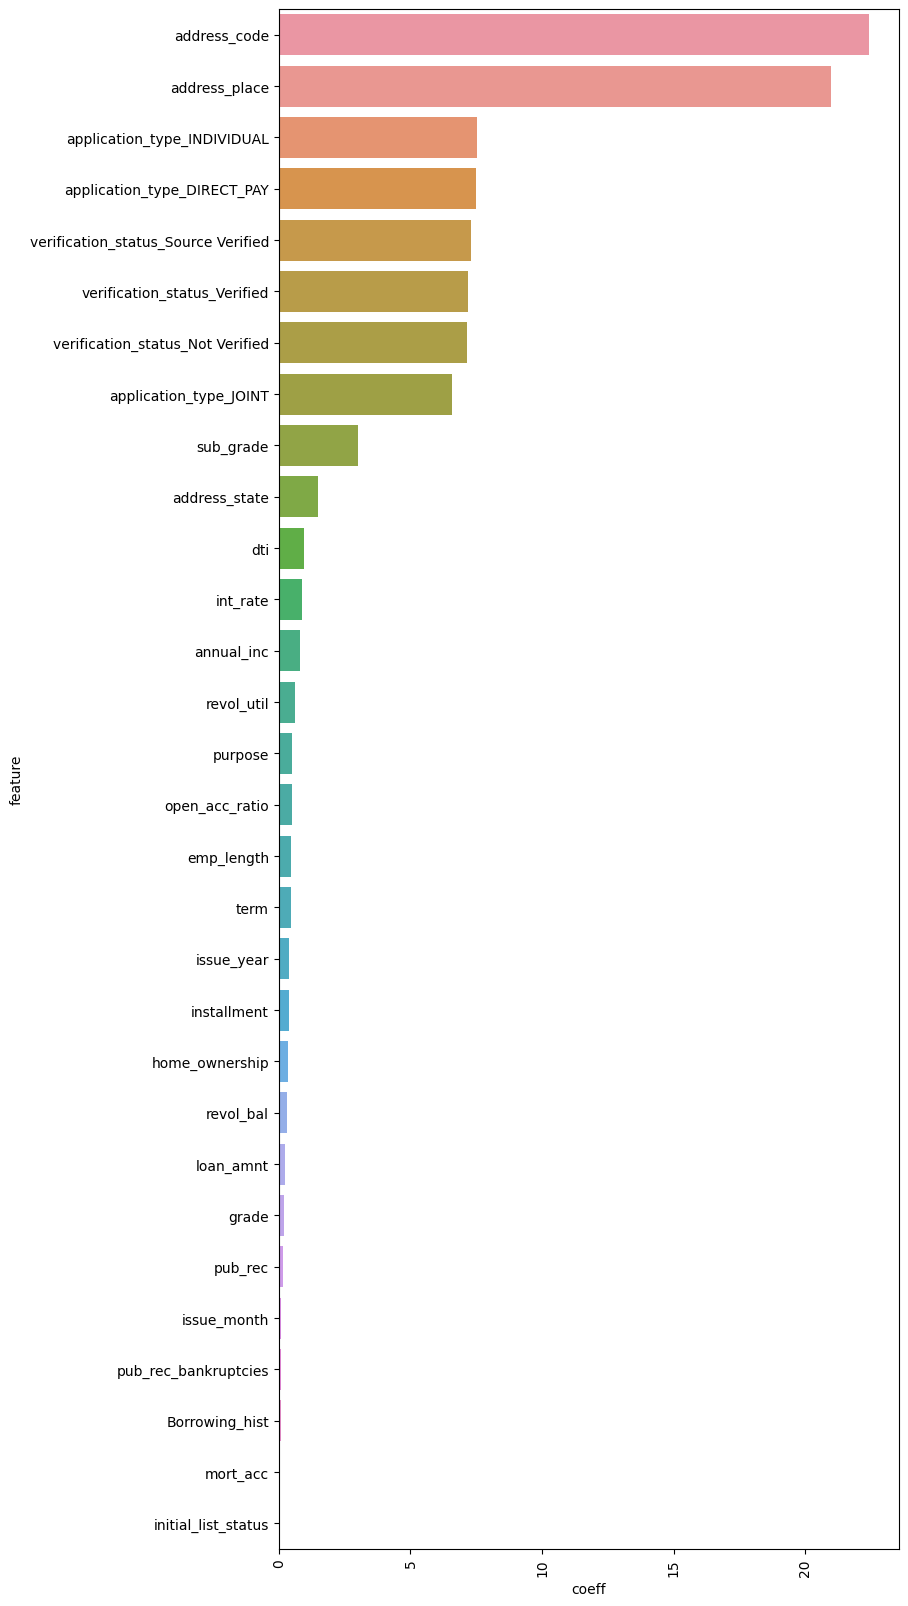

In [60]:
plt.figure(figsize = (8,20))
sns.barplot(y='feature', x='coeff', data=weights)
plt.xticks(rotation=90)
plt.show()

* Address Code & Adress Place has the Highest weight for Classification
* Next comes application_type_INDIVIDUAL , application_type_DIRECT_PAY , verification_status_Source Verified , verification_status_Verified , verification_status_Not Verified ,  application_type_JOINT
* initial_list_status, Mort_acc,Borrowing_hist has least weights

## Accuracy

In [61]:
model.score(Xtrain,ytrain)

0.7980329772996995

In [62]:
ypred = model.predict(Xtest)

In [63]:
model.score(Xtest,ytest)

0.7965558164785496

* 79% Predictions by our model are accurate

## Precision

In [64]:
precision_score(ytest, ypred)

0.9375069027721533

* 93% of all Positive prediction are truly positve

## Recall

In [65]:
recall_score(ytest, ypred)

0.8001728201099765

* Our Model is prediciton only 80% of all true Positives as postives

## F1 Score

In [66]:
f1_score(ytest,ypred)

0.8634128975384825

* From F1_score of 0.86, we can say Our model has almost good balance between False Positives and False Negative
* However there is need to Further improve F1_Score

## Confusion Matrix

In [67]:
conf_matrix = confusion_matrix(ytest, ypred)
conf_matrix

array([[12161,  3395],
       [12719, 50931]])

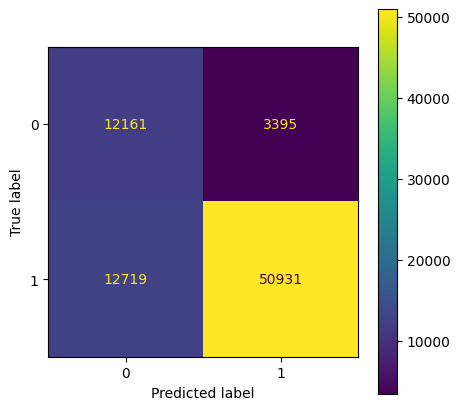

In [68]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

* As Seen Earlier from High Precision and  Better Recall values, same is reflected in Confusion Matrix
* Our model is Predicitng Low False Positive meaning high Precision Score [Possibility of Faulty Loans are Less]
* At the same time our Model is prediciting slight High False Negative meaning low Recall Score [More Chance of loosing bussiness of actually eligible borrowers]

## ROC

In [69]:
probability = model.predict_proba(Xtest)

In [70]:
probabilites = probability[:,1]

In [71]:
fpr, tpr, thr = roc_curve(ytest,probabilites)

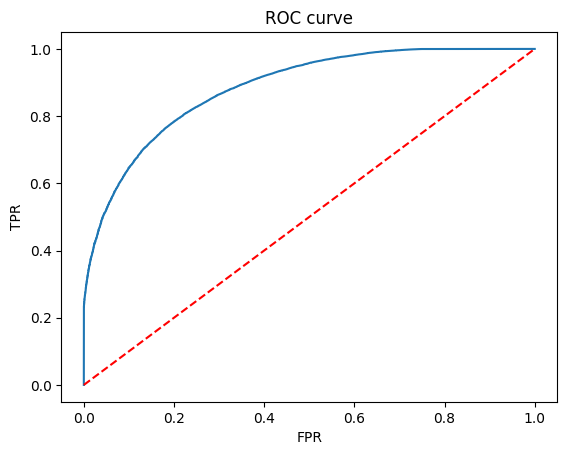

In [72]:
plt.plot(fpr,tpr)

#random model for reference
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [73]:
roc_auc_score(ytest,probabilites)

0.8841968969217869

roc_auc_score is 0.88 meaning our model can 88% efficiently Distinguish Positve and Neagative Classes

## Precision Recall Curve

In [74]:
precision, recall, thr = precision_recall_curve(ytest, probabilites)

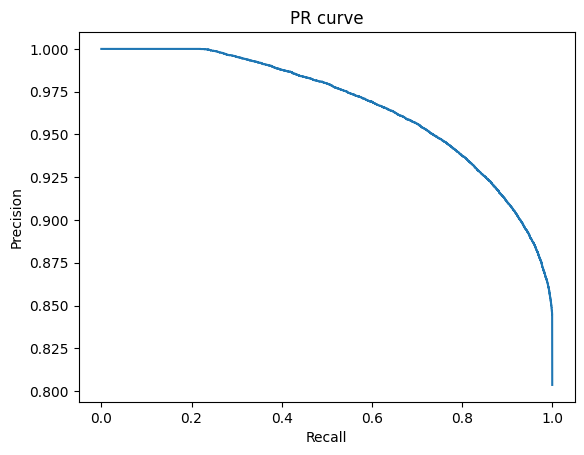

In [75]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [76]:
auc(recall, precision)

0.9671246217738954

* 0.967 AUC under PR curve represents that our model has high Presicion and Recall values

## Trade off Question-1

* How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it?

solution

* In Order to Detect Real Defaulter and Less False Positives -->  **We should Focus and Maximize Specificity of our Model**
* Meaning We should increase TN and Decrease FP of our Model
* But as whole View point of Loan Bussines We have to reduce False positives [to reduce Non Performing Assets] and False Negative [not to miss possible bussiness opputunities], so **as a whole F1_Score should be Considered**

In [77]:
specificity = conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[0][1])

In [78]:
specificity

0.7817562355361275

In [79]:
f1_score(ytest,ypred)

0.8634128975384825

* In our Present Model, We can predict 78% Defaulters correctly out of all Defaulters
* In our Present Model, F1_Score is 0.86 which is good Values but can be Improved
* There is further Scope to Improve our Model with the help of better Classification models & Balancing techniques like SMOTE

## Trade off Question-2

* Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.?

solution

* In order to Reduce NPA, We should give loan only to truly Eligible Canidate , we have to reduce False Positive Candidates
* So we have to Reduce FP & Increase TP
* So we should focus on **Precision**

In [80]:
precision = conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[0][1])

In [81]:
precision

0.9375069027721533

* In our Present Model, 93.75% of all eligible Borrowers classified by the Model are truly Eligible
* However we have to keep in mind more we improve the Precision Score, higher will become False Negative, so a balance had to be maintained for this Loan Eligibility Classification Model by using F1_Score

In [82]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.49      0.78      0.60     15556
         1.0       0.94      0.80      0.86     63650

    accuracy                           0.80     79206
   macro avg       0.71      0.79      0.73     79206
weighted avg       0.85      0.80      0.81     79206



# **Check Assumptions of Linear Regression**

## VIF

* Below is Iterative code for removing High VIF features by maintaining threshold for VIF<=5 [iterates code till none of features VIF >5

In [ ]:
vif_thr =5
r2_thr = 0 # focusing only on VIF irrepsctive of feature removal effect on R-Square Adj
j = 1
feats_removed = []
cols2 = Xtrain.columns
while True:
    vif = pd.DataFrame()
    X_t = pd.DataFrame(Xtrain, columns=Xtrain.columns)[cols2]
    vif['Features'] = cols2
    vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    cols2 = vif["Features"][1:].values
    X2 = pd.DataFrame(Xtrain, columns=Xtrain.columns)[cols2] #Dropped the feature with high VIF & Again check Perfromance of the reamining data

    X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
    sm_model = sm.OLS(list(ytrain), X2_sm).fit()
    if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
        print('Reached threshold')
        print('Highest vif:',vif.iloc[0])
        print('Current adj.R2',sm_model.rsquared_adj)
        print('Features removed:', j-1)
        print('List of features removed:', feats_removed)
        break
    feats_removed.append(vif.iloc[0]['Features']) # Addting the high VIF removed feature name to feats_removed
    j += 1
print()
print("*******************************************************************************************************************************")
print()
# Final Assesment of Data after removing all possible high VIF feature with set Threshold values
print(vif)
print(sm_model.summary())

* By focusing only on VIF Score < 5 -->  five Feaures ['CGPA', 'TOEFL Score', 'SOP', 'GRE Score', 'University Rating'] have been Removed
* As a results Rsqure_adj of the model came down to 0.294 --> Not a good Model for Prediction

* Now we will focus both on VIF & R-Square Adj

* Below is Iterative code for auto removing High VIF features by maintaing threshold for **VIF<=5 & Rsquare_adj >=0.8**

In [86]:
vif_thr =5
r2_thr = 0.8
j = 1
feats_removed = []
cols2 = Xtrain.columns
while True:
    vif = pd.DataFrame()
    X_t = pd.DataFrame(Xtrain, columns=Xtrain.columns)[cols2]
    vif['Features'] = cols2
    vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    if j == 1:
        print("****************************")
        print("Initial Condition")
        print("****************************")
        print(vif)
        print()

    cols2 = vif["Features"][1:].values
    X2 = pd.DataFrame(Xtrain, columns=Xtrain.columns)[cols2] #Dropped the feature with high VIF & Again check Perfromance of the reamining data

    X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
    sm_model = sm.OLS(list(ytrain), X2_sm).fit()
    if (vif.iloc[0]['VIF'] <= vif_thr) or (sm_model.rsquared_adj < r2_thr):

        print("Checking VIF")
        print("****************************")
        print('Reached threshold')
        print('Highest vif :',vif.iloc[0])
        print('Current adj.R2 if Highest VIF feature removed:',sm_model.rsquared_adj)
        print('Features removed :', j-1)
        print('List of features removed :', feats_removed)
        break
    feats_removed.append(vif.iloc[0]['Features']) # Addting the high VIF removed feature name to feats_removed
    j += 1
print("***************************************************************************")
# Final Assesment of Data after removing all possible high VIF feature with set Threshold values

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


****************************
Initial Condition
****************************
                               Features    VIF
29               application_type_JOINT    inf
24     verification_status_Not Verified    inf
28          application_type_INDIVIDUAL    inf
27          application_type_DIRECT_PAY    inf
26         verification_status_Verified    inf
25  verification_status_Source Verified    inf
0                             loan_amnt  59.79
3                           installment  51.66
5                             sub_grade  39.80
4                                 grade  22.58
2                              int_rate  19.26
1                                  term   6.74
12                            revol_bal   1.95
8                            annual_inc   1.79
15                             mort_acc   1.56
18                           issue_year   1.51
11                              pub_rec   1.41
16                 pub_rec_bankruptcies   1.39
13                           re

* CGPA  Score has very high VIF values
* But removal of these features is detoriating our Model,Bringing down Rsquare_adj to 0.776 which is less than threshold < 0.8

# **Model Training - Linear Regression[Ridge]**

In [ ]:
model2 = Ridge(alpha = 0.001)
model2.fit(Xtrain,ytrain)
print(model2.intercept_)
print(model2.coef_)

0.022438486565023008
[0.16918593 0.13146555 0.03074948 0.01361192 0.1032931  0.56138234
 0.03924791]


In [ ]:
model2.score(Xtrain, ytrain)

0.82928485385645

In [ ]:
model2.score(Xtest, ytest)

0.7927324857587962

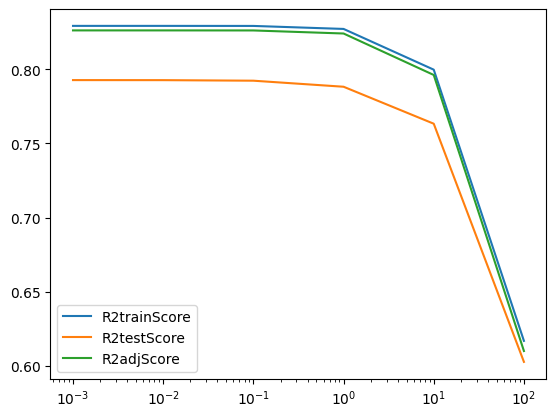

In [ ]:
# let us do L1 Regularization constant Hyperparameter Tuning
R2testScore = []
R2trainScore = []
R2adjScore=[]
hyperparameter = [0.001,0.01,0.1,1,10,100]
for i in hyperparameter:
  model2 = Ridge(alpha=i)
  model2.fit(Xtrain,ytrain)

  R2 = model2.score(Xtrain,ytrain)
  R2trainScore.append(R2)
  R2testScore.append(model2.score(Xtest,ytest))
  R2adjScore.append(R2adj(Xtrain,R2))

sns.lineplot(x=hyperparameter, y=R2trainScore, label = "R2trainScore")
sns.lineplot(x=hyperparameter, y=R2testScore , label = "R2testScore")
sns.lineplot(x=hyperparameter, y=R2adjScore , label = "R2adjScore")
plt.xscale('log')
plt.show()

* we are are getting R-Square Detoriated with increase in L2 Regularization constant
* Meaning with our Earlier Linear Regression Model was good with Given 7 features, further by increasing Regularization we are detoriating our model by underfitting
* so now we will use Polynomial Feature and check if our Linear Regression Model can be further Increased

# **Bussiness Insights**

In [92]:
data2=data.copy()

* All the student applied are meritorious
** CGPA of the Student are >= 7.0
** GRE Scores are greater than 290, More No of Data points are in that range 310 ~ 327
** TOEFL Scores are greater than 91, More No of Data points are in that range 99~112
* All features have Positive correlation with "Chance of Admit"
** CGPA[0.88],GRE Score[0.81],TOEFL Score[0.79] has very high correlation with "Chance of Admit"
** Further SOP[0.68], LOR[0.65] has almost same Correlation with ""Chance of Admit"
** Comparatively Low Correlation is found w.r.t Reasearch & "Chance of Admit"[0.55], However is positively impactful
* From Stats OLS model Summary R- Squared is 0.829 and R-Squared Adj is 0.826, from which we can say all the features in the model are relevant
** CGPA is the most important & Significant Feature for predicting "Chance of Admit"
** Next singificant feature in decreasing order comes: GRE Score, TOEFL Score, LOR
** Research, University Rating & SOP are less signifcant  for Predicting "Chance of Admit"
* From R-square Values of Train[0.829] & Test Data[0.792], we can say model is neither Overfit nor Underfit, It is Best Fit
* All Assumpitions of Linear Regression are almost Satisfied
* Further Use Regularization of Constant with Lasso and Ridge did not show much improvement as our OLS model is already Best Fit
* However use of 2nd degree Polynomial feature very slightly improved Rsquare Adj from 0.826 --> 0.831





# **Recommendations**

* In order to improve the Model Following additional Features can be added
** Under graduation College Rating
** Extra Circular activity with an Unified Rating
** Personal Essay Rating
** Professional Working Experience
** Financial Status

* further we can get actual data of Admission [yes or No] of past History records  to understand the Actual Threshold for "Chance of Admit" to definetely get admitted

* With the help of above model, Jamboree can confidently guide the Students with exact course of action meaning what score/rating to improve to get admission to particular college
